<a href="https://colab.research.google.com/github/kurtsenol/machine-learning/blob/master/TopicModeling/LDA_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import pickle

In [ ]:
# DATA_PATH = 'drive/My Drive/Topic_Modeling/Dataset/'

In [ ]:
# folder = os.listdir(DATA_PATH)

# df = pd.DataFrame()

# for file_name in folder:
#   df_temp= pd.read_excel(DATA_PATH + file_name)
#   df_temp = df_temp[['TI', 'SO', 'PY','AB']]
#   df= pd.concat([df, df_temp], ignore_index=True)

In [ ]:
# df

In [ ]:
# df.info()

In [ ]:
# df.columns = ['Title', 'Journal', 'Year', 'Abstract']

In [ ]:
# df['Abstract'].isnull().sum()

In [ ]:
# df[df['Abstract'].isnull()]

In [ ]:
# mis = df[df['Abstract'].isnull()]

In [ ]:
# mis.to_excel('drive/My Drive/Topic_Modeling/missing.xlsx')

In [ ]:
# mis = df[df['Year'].isnull()]

In [ ]:
# mis.to_excel('drive/My Drive/Topic_Modeling/missing_year.xlsx')

In [ ]:
# df.dropna(subset=['Abstract'], inplace=True)

In [ ]:
# df.reset_index(inplace=True, drop=True)

In [ ]:
# df.info()

In [ ]:
#df.to_pickle("drive/My Drive/Topic_Modeling/topic_df.pkl")

In [ ]:
df = pd.read_pickle("drive/My Drive/Topic_Modeling/topic_df.pkl")

In [ ]:
df

Title  ...                                           Abstract
0      TWO-DIRECTIONAL CONVERGENCE OF PLATFORM AND PI...  ...  PURPOSE THIS ARTICLE EXAMINES THE NEW PHENOMEN...
1      EMPLOYEE WELLNESS ON THE FRONTLINE: AN INTERAC...  ...  PURPOSE EMPLOYEE WELLNESS IS VITAL TO CREATING...
2      DEMOGRAPHIC AND ATTITUDINAL ANTECEDENTS OF CON...  ...  PURPOSE TO INVESTIGATE IF ONLINE TV CONTENT PL...
3      MORE THAN A FEELING? TOWARD A THEORY OF CUSTOM...  ...  PURPOSE RESPONDING TO AN INCREASING CALL FOR A...
4      ACCOUNTABLE ALGORITHMS? THE ETHICAL IMPLICATIO...  ...  PURPOSE THE PURPOSE OF THIS STUDY IS TO IDENTI...
...                                                  ...  ...                                                ...
11923  MEASURING SEASONAL DEMAND FOR SPANISH AIRPORTS...  ...  USING GINI COEFFICIENTS, THIS PAPER INVESTIGAT...
11924  NEW EMPIRICAL EVIDENCE ON AIRPORT CAPACITY UTI...  ...  AN IMPORTANT QUESTION IN FORECASTING AIR TRAFF...
11925  POTENTIAL FOR ABU DHABI, DOHA AND DUBAI AIRPOR...  ...  THE AIR TRANSPORT MARKET IN THE MIDDLE EAST IS...
11926  SEEDING GROWTH AT AIRPORTS AND AIRPORT CITIES:...  ...  AIRPORTS ARE EVOLVING FROM SIMPLE INFRASTRUCTU...
11927  THE OBJECTIVES AND OUTCOMES OF AIRPORT PRIVATI...  ...  AIRPORT PRIVATISATION IS A CONTROVERSIAL YET G...

[11928 rows x 4 columns]

In [ ]:
df_temp =pd.read_excel('drive/My Drive/Topic_Modeling/Extra_Data/ritm.xlsx')

df_temp

Title  ...                                           Abstract
0   Business strategies and technology for access ...  ...  Providing access via public transport in relat...
1   Developing and applying interactive visual too...  ...  This paper presents findings from an English s...
2   Does Accessibility Planning address what matte...  ...  “Accessibility” has become commonplace in tran...
3   Evaluating accessibility enhancements to publi...  ...  It is recognised that the beneficiaries of acc...
4   Improving access to employment and training in...  ...  The Access Alliance Programme (the AAP) was a ...
5   Learning to cycle again: Examining the benefit...  ...  In 2009, the Irish government introduced a tax...
6   Market concentration in coastal shipping and l...  ...  Since 2001 institutional reforms have occurred...
7   Passengers' valuations of universal design mea...  ...  The concept of Universal Design (UD) in local ...
8   Public transport accessibility through co-moda...  ...  Improving the accessibility of areas using pub...
9   The key factors for providing successful publi...  ...  Providing public transport in low-density area...
10  The use and abuse of accessibility measures in...  ...  This paper reviews accessibility concepts and ...
11  Acceptance of self-service check-in at Zurich ...  ...  This paper deals with air travelers' acceptanc...
12  Airport surface access in the UK: A management...  ...  Air passenger traffic in the UK has increased ...
13  Analysis of passenger queues at airport terminals  ...  This paper presents an approach for analyzing ...
14  Assessing the importance of hub airports for c...  ...  The air cargo sector has developed very rapidl...
15  Business models for airports in a competitive ...  ...  Airport reforms have promoted the principle of...
16  Designing the commercial sustainability of unp...  ...  Most Japanese regional airports are commercial...
17  Do dedicated low-cost passenger terminals crea...  ...  Traditionally designed for network carrier ope...
18        Do privatized airports add financial value?  ...  The airport business is very capital intensive...
19  Ground handling in a changing market. The case...  ...  The starting point for this paper is the Europ...
20  Incentive schemes on airport charges — Theoret...  ...  A substantial and growing number of airports h...
21  Managing airport land development under regula...  ...  Airport development is an inherently risky pro...
22  Measuring seasonal demand for Spanish airports...  ...  Using Gini coefficients, this paper investigat...
23  New empirical evidence on airport capacity uti...  ...  An important question in forecasting air traff...
24  Potential for Abu Dhabi, Doha and Dubai Airpor...  ...  The air transport market in the Middle East is...
25  Seeding growth at airports and airport cities:...  ...  Airports are evolving from simple infrastructu...
26  The objectives and outcomes of airport privati...  ...  Airport privatisation is a controversial yet g...

[27 rows x 4 columns]

In [ ]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     27 non-null     object
 1   Year      27 non-null     int64 
 2   Journal   27 non-null     object
 3   Abstract  27 non-null     object
dtypes: int64(1), object(3)
memory usage: 992.0+ bytes


In [ ]:
df_temp['Title'] = df_temp['Title'].str.upper()

In [ ]:
df_temp['Journal'] = df_temp['Journal'].str.upper()

In [ ]:
df_temp['Abstract'] = df_temp['Abstract'].str.upper()

In [ ]:
df_temp

Title  ...                                           Abstract
0   BUSINESS STRATEGIES AND TECHNOLOGY FOR ACCESS ...  ...  PROVIDING ACCESS VIA PUBLIC TRANSPORT IN RELAT...
1   DEVELOPING AND APPLYING INTERACTIVE VISUAL TOO...  ...  THIS PAPER PRESENTS FINDINGS FROM AN ENGLISH S...
2   DOES ACCESSIBILITY PLANNING ADDRESS WHAT MATTE...  ...  “ACCESSIBILITY” HAS BECOME COMMONPLACE IN TRAN...
3   EVALUATING ACCESSIBILITY ENHANCEMENTS TO PUBLI...  ...  IT IS RECOGNISED THAT THE BENEFICIARIES OF ACC...
4   IMPROVING ACCESS TO EMPLOYMENT AND TRAINING IN...  ...  THE ACCESS ALLIANCE PROGRAMME (THE AAP) WAS A ...
5   LEARNING TO CYCLE AGAIN: EXAMINING THE BENEFIT...  ...  IN 2009, THE IRISH GOVERNMENT INTRODUCED A TAX...
6   MARKET CONCENTRATION IN COASTAL SHIPPING AND L...  ...  SINCE 2001 INSTITUTIONAL REFORMS HAVE OCCURRED...
7   PASSENGERS' VALUATIONS OF UNIVERSAL DESIGN MEA...  ...  THE CONCEPT OF UNIVERSAL DESIGN (UD) IN LOCAL ...
8   PUBLIC TRANSPORT ACCESSIBILITY THROUGH CO-MODA...  ...  IMPROVING THE ACCESSIBILITY OF AREAS USING PUB...
9   THE KEY FACTORS FOR PROVIDING SUCCESSFUL PUBLI...  ...  PROVIDING PUBLIC TRANSPORT IN LOW-DENSITY AREA...
10  THE USE AND ABUSE OF ACCESSIBILITY MEASURES IN...  ...  THIS PAPER REVIEWS ACCESSIBILITY CONCEPTS AND ...
11  ACCEPTANCE OF SELF-SERVICE CHECK-IN AT ZURICH ...  ...  THIS PAPER DEALS WITH AIR TRAVELERS' ACCEPTANC...
12  AIRPORT SURFACE ACCESS IN THE UK: A MANAGEMENT...  ...  AIR PASSENGER TRAFFIC IN THE UK HAS INCREASED ...
13  ANALYSIS OF PASSENGER QUEUES AT AIRPORT TERMINALS  ...  THIS PAPER PRESENTS AN APPROACH FOR ANALYZING ...
14  ASSESSING THE IMPORTANCE OF HUB AIRPORTS FOR C...  ...  THE AIR CARGO SECTOR HAS DEVELOPED VERY RAPIDL...
15  BUSINESS MODELS FOR AIRPORTS IN A COMPETITIVE ...  ...  AIRPORT REFORMS HAVE PROMOTED THE PRINCIPLE OF...
16  DESIGNING THE COMMERCIAL SUSTAINABILITY OF UNP...  ...  MOST JAPANESE REGIONAL AIRPORTS ARE COMMERCIAL...
17  DO DEDICATED LOW-COST PASSENGER TERMINALS CREA...  ...  TRADITIONALLY DESIGNED FOR NETWORK CARRIER OPE...
18        DO PRIVATIZED AIRPORTS ADD FINANCIAL VALUE?  ...  THE AIRPORT BUSINESS IS VERY CAPITAL INTENSIVE...
19  GROUND HANDLING IN A CHANGING MARKET. THE CASE...  ...  THE STARTING POINT FOR THIS PAPER IS THE EUROP...
20  INCENTIVE SCHEMES ON AIRPORT CHARGES — THEORET...  ...  A SUBSTANTIAL AND GROWING NUMBER OF AIRPORTS H...
21  MANAGING AIRPORT LAND DEVELOPMENT UNDER REGULA...  ...  AIRPORT DEVELOPMENT IS AN INHERENTLY RISKY PRO...
22  MEASURING SEASONAL DEMAND FOR SPANISH AIRPORTS...  ...  USING GINI COEFFICIENTS, THIS PAPER INVESTIGAT...
23  NEW EMPIRICAL EVIDENCE ON AIRPORT CAPACITY UTI...  ...  AN IMPORTANT QUESTION IN FORECASTING AIR TRAFF...
24  POTENTIAL FOR ABU DHABI, DOHA AND DUBAI AIRPOR...  ...  THE AIR TRANSPORT MARKET IN THE MIDDLE EAST IS...
25  SEEDING GROWTH AT AIRPORTS AND AIRPORT CITIES:...  ...  AIRPORTS ARE EVOLVING FROM SIMPLE INFRASTRUCTU...
26  THE OBJECTIVES AND OUTCOMES OF AIRPORT PRIVATI...  ...  AIRPORT PRIVATISATION IS A CONTROVERSIAL YET G...

[27 rows x 4 columns]

In [ ]:
# df_t = df_temp[~df_temp['Abstract'].isna()]

In [ ]:
# df_t.info()

In [ ]:
# df_t = df_t.dropna(subset=[8])

In [ ]:
# df_t

In [ ]:
# df_t = df_t.drop(["Authour "], axis=1)

In [ ]:
# df_t.columns= ['Title', 'Journal','Year', 'Abstract']

In [ ]:
# df_t

In [ ]:
# df_t[['Title', 'Journal', 'Abstract']] = df_t[['Title', 'Journal', 'Abstract']].apply(lambda x: x.str.upper())

In [ ]:
# df_t.Journal = 'JOURNAL OF HOSPITALITY AND TOURISM RESEARCH'

In [ ]:
# df_t

In [ ]:
# df_t.Year = df_t.Year.astype('int')

In [ ]:
# df_temp = df_temp[['TI', 'SO', 'PY','AB']]

In [ ]:
# df_temp.columns = ['Title', 'Journal', 'Year', 'Abstract']

In [ ]:
# df_temp

In [ ]:
# df_temp.dropna(subset=['Abstract'], inplace=True)

In [ ]:
# df_temp.info()

In [ ]:
# df

In [ ]:
df= pd.concat([df, df_temp], ignore_index=True)

In [ ]:
import re

In [ ]:
# def find_elsevier(x):
#   match = re.search("ELSEVIER", x)
#   if match: 
#     s = match.start()-10
#     x=x[:s]
#   return x

In [ ]:
# df.Abstract = df.Abstract.apply(find_elsevier)

In [ ]:
# mask =(df.Abstract.str.contains('ELSEVIER'))
# df_temp = df[mask]

In [ ]:
# df_temp

In [ ]:
df[df.Abstract.str.len()<300]

Title  ... Abstract
11739       INTRODUCING OUR DISTINGUISHED SCHOLAR SERIES  ...         
11784  CUSTOMER ENGAGEMENT IN HOSPITALITY AND TOURISM...  ...         

[2 rows x 4 columns]

In [ ]:
# df.to_excel('drive/My Drive/Topic_Modeling/articles.xlsx')

In [ ]:
# df_temp_1 = pd.read_excel('drive/My Drive/Topic_Modeling/Extra_Data/missing_year.xlsx', index_col=0)

In [ ]:
# df.Year.fillna(df_temp_1.Year, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11955 entries, 0 to 11954
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     11955 non-null  object
 1   Journal   11955 non-null  object
 2   Year      11955 non-null  int64 
 3   Abstract  11955 non-null  object
dtypes: int64(1), object(3)
memory usage: 373.7+ KB


In [ ]:
# df_temp = pd.read_excel('drive/My Drive/Topic_Modeling/Extra_Data/missing.xls', na_values='There is no abstract', index_col=0)

In [ ]:
# df_temp.head()

In [ ]:
# df_temp.info()

In [ ]:
# df_temp.loc[df_temp.Abstract.str.len()<50, ['Abstract']] = np.nan

In [ ]:
# df_temp.dropna(subset=['Abstract'], inplace=True)

In [ ]:
# df_temp.Abstract = df_temp.Abstract.str.strip()

In [ ]:
# df_temp

In [ ]:
# df.info()

In [ ]:
# df= pd.concat([df, df_temp], ignore_index=True)

In [ ]:
# df.info()

In [ ]:
# df_temp = pd.read_excel('drive/My Drive/Topic_Modeling/Extra_Data/Tourism management perspectives-without 2011_Fewen.xlsx')

In [ ]:
# df_temp

In [ ]:
# df_temp.columns

In [ ]:
# df_temp.drop(['Authors'], axis=1, inplace=True)

In [ ]:
# df_temp.columns = ['Title', 'Year','Journal', 'Abstract']

In [ ]:
# df_temp

In [ ]:
# col = list(df_temp)

In [ ]:
# col.remove('Year')


In [ ]:
# for item in col:
#   df_temp[item] = df_temp[item].str.upper()

In [ ]:
# df_temp

In [ ]:
df.groupby('Journal')['Abstract'].count()

Journal
ANNALS OF TOURISM RESEARCH                                       710
CORNELL HOSPITALITY QUARTERLY                                    331
CURRENT ISSUES IN TOURISM                                        948
INTERNATIONAL JOURNAL OF CONTEMPORARY HOSPITALITY MANAGEMENT    1037
INTERNATIONAL JOURNAL OF HOSPITALITY MANAGEMENT                 1373
INTERNATIONAL JOURNAL OF TOURISM RESEARCH                        552
JOURNAL OF HOSPITALITY AND TOURISM MANAGEMENT                    318
JOURNAL OF HOSPITALITY AND TOURISM RESEARCH                      352
JOURNAL OF HOSPITALITY MARKETING & MANAGEMENT                    407
JOURNAL OF SERVICE MANAGEMENT                                    316
JOURNAL OF SUSTAINABLE TOURISM                                   802
JOURNAL OF TRAVEL & TOURISM MARKETING                            624
JOURNAL OF TRAVEL RESEARCH                                       686
JOURNAL OF VACATION MARKETING                                    254
RESEARCH IN TRANSPORTATION

In [ ]:
# df["Journal"]= df['Journal'].str.replace("JOURNAL OF HOSPITALITY MARKETING AND MANAGEMENT", "JOURNAL OF HOSPITALITY MARKETING & MANAGEMENT")

In [ ]:
# df["Journal"]= df['Journal'].str.replace("RESEARCH IN TRANSPORTATION BUSINESS AND MANAGEMENT", "RESEARCH IN TRANSPORTATION BUSINESS & MANAGEMENT")

In [ ]:
df.groupby('Journal')['Abstract'].count()

Journal
ANNALS OF TOURISM RESEARCH                                       710
CORNELL HOSPITALITY QUARTERLY                                    331
CURRENT ISSUES IN TOURISM                                        948
INTERNATIONAL JOURNAL OF CONTEMPORARY HOSPITALITY MANAGEMENT    1037
INTERNATIONAL JOURNAL OF HOSPITALITY MANAGEMENT                 1373
INTERNATIONAL JOURNAL OF TOURISM RESEARCH                        552
JOURNAL OF HOSPITALITY AND TOURISM MANAGEMENT                    318
JOURNAL OF HOSPITALITY AND TOURISM RESEARCH                      352
JOURNAL OF HOSPITALITY MARKETING & MANAGEMENT                    407
JOURNAL OF SERVICE MANAGEMENT                                    316
JOURNAL OF SUSTAINABLE TOURISM                                   802
JOURNAL OF TRAVEL & TOURISM MARKETING                            624
JOURNAL OF TRAVEL RESEARCH                                       686
JOURNAL OF VACATION MARKETING                                    254
RESEARCH IN TRANSPORTATION

In [ ]:
order = df.Journal.value_counts(ascending=True).index

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


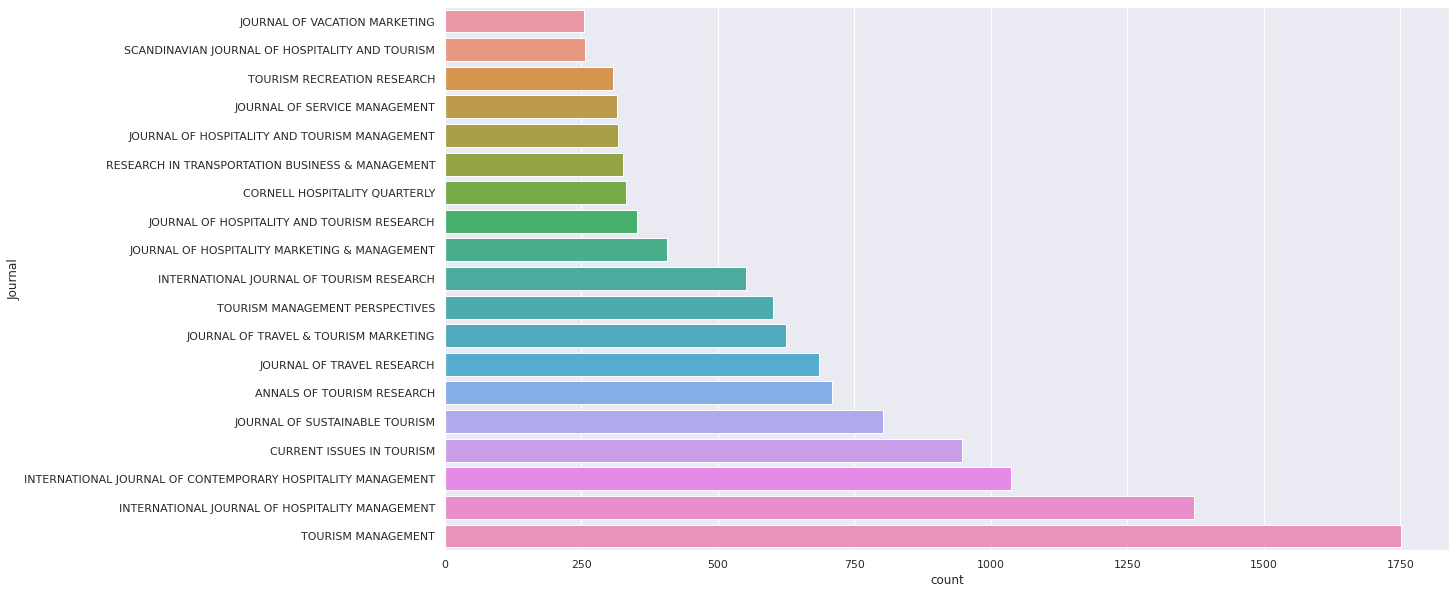

In [ ]:
plt.figure(figsize=(18,10))
g = sns.countplot(y='Journal', data=df, orient='h', order=order)

# plt.savefig('drive/My Drive/Topic_Modeling/fig.png')

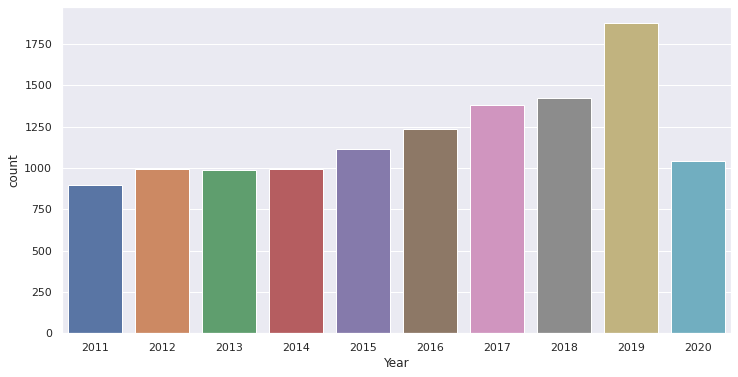

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Year', data=df, orient='v');

In [ ]:
def color_zeros(val):
  background_color = 'yellow' if val == 0 else 'white'
  return 'background-color: %s' % background_color

In [ ]:
df_o = pd.crosstab(df.Journal, df.Year, dropna=False)#.style.applymap(color_zeros)
df_o

Year                                                2011  2012  ...  2019  2020
Journal                                                         ...            
ANNALS OF TOURISM RESEARCH                            66    87  ...   115    51
CORNELL HOSPITALITY QUARTERLY                         47    31  ...    32    23
CURRENT ISSUES IN TOURISM                             42    53  ...   247   148
INTERNATIONAL JOURNAL OF CONTEMPORARY HOSPITALI...    53    52  ...   217    87
INTERNATIONAL JOURNAL OF HOSPITALITY MANAGEMENT      110   144  ...   236   125
INTERNATIONAL JOURNAL OF TOURISM RESEARCH             39    41  ...    76    43
JOURNAL OF HOSPITALITY AND TOURISM MANAGEMENT         18    16  ...    74    26
JOURNAL OF HOSPITALITY AND TOURISM RESEARCH           24    24  ...    53    22
JOURNAL OF HOSPITALITY MARKETING & MANAGEMENT         42    45  ...    52    27
JOURNAL OF SERVICE MANAGEMENT                         30    32  ...    29    23
JOURNAL OF SUSTAINABLE TOURISM                        42    59  ...   102   108
JOURNAL OF TRAVEL & TOURISM MARKETING                 52    52  ...    76    21
JOURNAL OF TRAVEL RESEARCH                            51    61  ...   118    88
JOURNAL OF VACATION MARKETING                         25    27  ...    35    19
RESEARCH IN TRANSPORTATION BUSINESS & MANAGEMENT      54    31  ...    26    12
SCANDINAVIAN JOURNAL OF HOSPITALITY AND TOURISM       31    20  ...    22    13
TOURISM MANAGEMENT                                   151   156  ...   218   108
TOURISM MANAGEMENT PERSPECTIVES                        0    46  ...    99    72
TOURISM RECREATION RESEARCH                           19    19  ...    52    28

[19 rows x 10 columns]

In [ ]:
#Total sum per column: 
df_o.loc['Total',:]= df_o.sum(axis=0).astype('int')

In [ ]:
df_o.index.str.capitalize()

Index(['Annals of tourism research', 'Cornell hospitality quarterly',
       'Current issues in tourism',
       'International journal of contemporary hospitality management',
       'International journal of hospitality management',
       'International journal of tourism research',
       'Journal of hospitality and tourism management',
       'Journal of hospitality and tourism research',
       'Journal of hospitality marketing & management',
       'Journal of service management', 'Journal of sustainable tourism',
       'Journal of travel & tourism marketing', 'Journal of travel research',
       'Journal of vacation marketing',
       'Research in transportation business & management',
       'Scandinavian journal of hospitality and tourism', 'Tourism management',
       'Tourism management perspectives', 'Tourism recreation research',
       'Total'],
      dtype='object', name='Journal')

In [ ]:
df_o['Total'] = df_o.sum(axis=1).astype('int')

In [ ]:
df_o.index = df_o.index.str.title( )

In [ ]:
df_o.astype('int')

Year                                                2011  2012  ...  2020  Total
Journal                                                         ...             
Annals Of Tourism Research                            66    87  ...    51    710
Cornell Hospitality Quarterly                         47    31  ...    23    331
Current Issues In Tourism                             42    53  ...   148    948
International Journal Of Contemporary Hospitali...    53    52  ...    87   1037
International Journal Of Hospitality Management      110   144  ...   125   1373
International Journal Of Tourism Research             39    41  ...    43    552
Journal Of Hospitality And Tourism Management         18    16  ...    26    318
Journal Of Hospitality And Tourism Research           24    24  ...    22    352
Journal Of Hospitality Marketing & Management         42    45  ...    27    407
Journal Of Service Management                         30    32  ...    23    316
Journal Of Sustainable Tourism                        42    59  ...   108    802
Journal Of Travel & Tourism Marketing                 52    52  ...    21    624
Journal Of Travel Research                            51    61  ...    88    686
Journal Of Vacation Marketing                         25    27  ...    19    254
Research In Transportation Business & Management      54    31  ...    12    327
Scandinavian Journal Of Hospitality And Tourism       31    20  ...    13    257
Tourism Management                                   151   156  ...   108   1752
Tourism Management Perspectives                        0    46  ...    72    601
Tourism Recreation Research                           19    19  ...    28    308
Total                                                896   996  ...  1044  11955

[20 rows x 11 columns]

In [ ]:
df_o.to_excel('drive/My Drive/Topic_Modeling/journal_year_table.xlsx')

In [ ]:
df.to_excel('drive/My Drive/Topic_Modeling/articles.xlsx')

In [ ]:
df.loc[11117]

Title       GAP YEAR VOLUNTEER TOURISM STORIES: SHARING MO...
Journal         JOURNAL OF HOSPITALITY MARKETING & MANAGEMENT
Year                                                     2013
Abstract    VOLUNTEER TOURISM HAS RECEIVED INCREASED ATTEN...
Name: 11117, dtype: object

In [ ]:
a = df.loc[11117, 'Abstract']
a

'VOLUNTEER TOURISM HAS RECEIVED INCREASED ATTENTION FROM ACADEMICS IN RECENT YEARS, MIRRORING THE GROWTH IN PROVIDERS AND PARTICIPATION. VOLUNTEER TOURISM IS OFTEN CONSIDERED TO BE A MORE SUSTAINABLE AND AUTHENTIC EXPERIENCE FOR THE VISITOR, AS WELL AS PROVIDING BENEFITS FOR THE HOST COMMUNITY. THIS ARTICLE BUILDS ON MORE RECENT CRITICAL RESEARCH THAT CONSIDERS THE HISTORICAL AND CULTURAL CONTEXT THAT SAW VOLUNTEER TOURISM REACH THE LEVEL OF POPULARITY IT HAS TODAY. THE GAP YEAR, AS A SUBSET OF VOLUNTEER TOURISM, IS ANALYZED SPECIFICALLY GIVEN ITS UNIQUE CONTEXT AND PARTICIPANT DEMOGRAPHIC. INTERVIEWS WITH RETURNED GAP YEAR VOLUNTEER TOURISTS FROM THE UK ARE ANALYZED, WITH STORIES SHARED DEMONSTRATING ACCEPTANCE, ADAPTATION AND REJECTION OF BROADER SOCIETAL NARRATIVES REGARDING INTERNATIONAL DEVELOPMENT, COLONIALISM, AND PERSONAL GROWTH. IMPLICATIONS FOR MARKETERS REVOLVE AROUND THE ENCOURAGEMENT OF REFLECTION FOR PARTICIPANTS ON THE PHENOMENON AND THEIR OWN PERSONAL EXPERIENCE TO ENHA

In [ ]:
df.loc[11117, 'Abstract'] = "Hotel operators strive to satisfy the needs of their guests and subse-quently retain them by trying to understand the factors that couldbuild up a strong loyal clientele base. Previous studies have foundthat there are four critical perspectives related to the hotel indus-try that enable hotel operators to cope with the fierce competitionin the industry and boost their profit margin: service quality, cus-tomer satisfaction, corporate image, and customer loyalty. Thisstudy attempts to evaluate the relationships between these perspec-tives. Systematic sampling approach was adopted in the study. Thedata was collected through self-administered questionnaires from200 respondents. Statistical Package for the Social Sciences (SPSS)was used to test the hypothesized relationships in the researchmodel. The findings reveal that the four variables are significantlyrelated to one another and they are useful for hotel operators topromote long-term business growth and ensure sustainability inthe hotel industry in Malaysia.".upper()

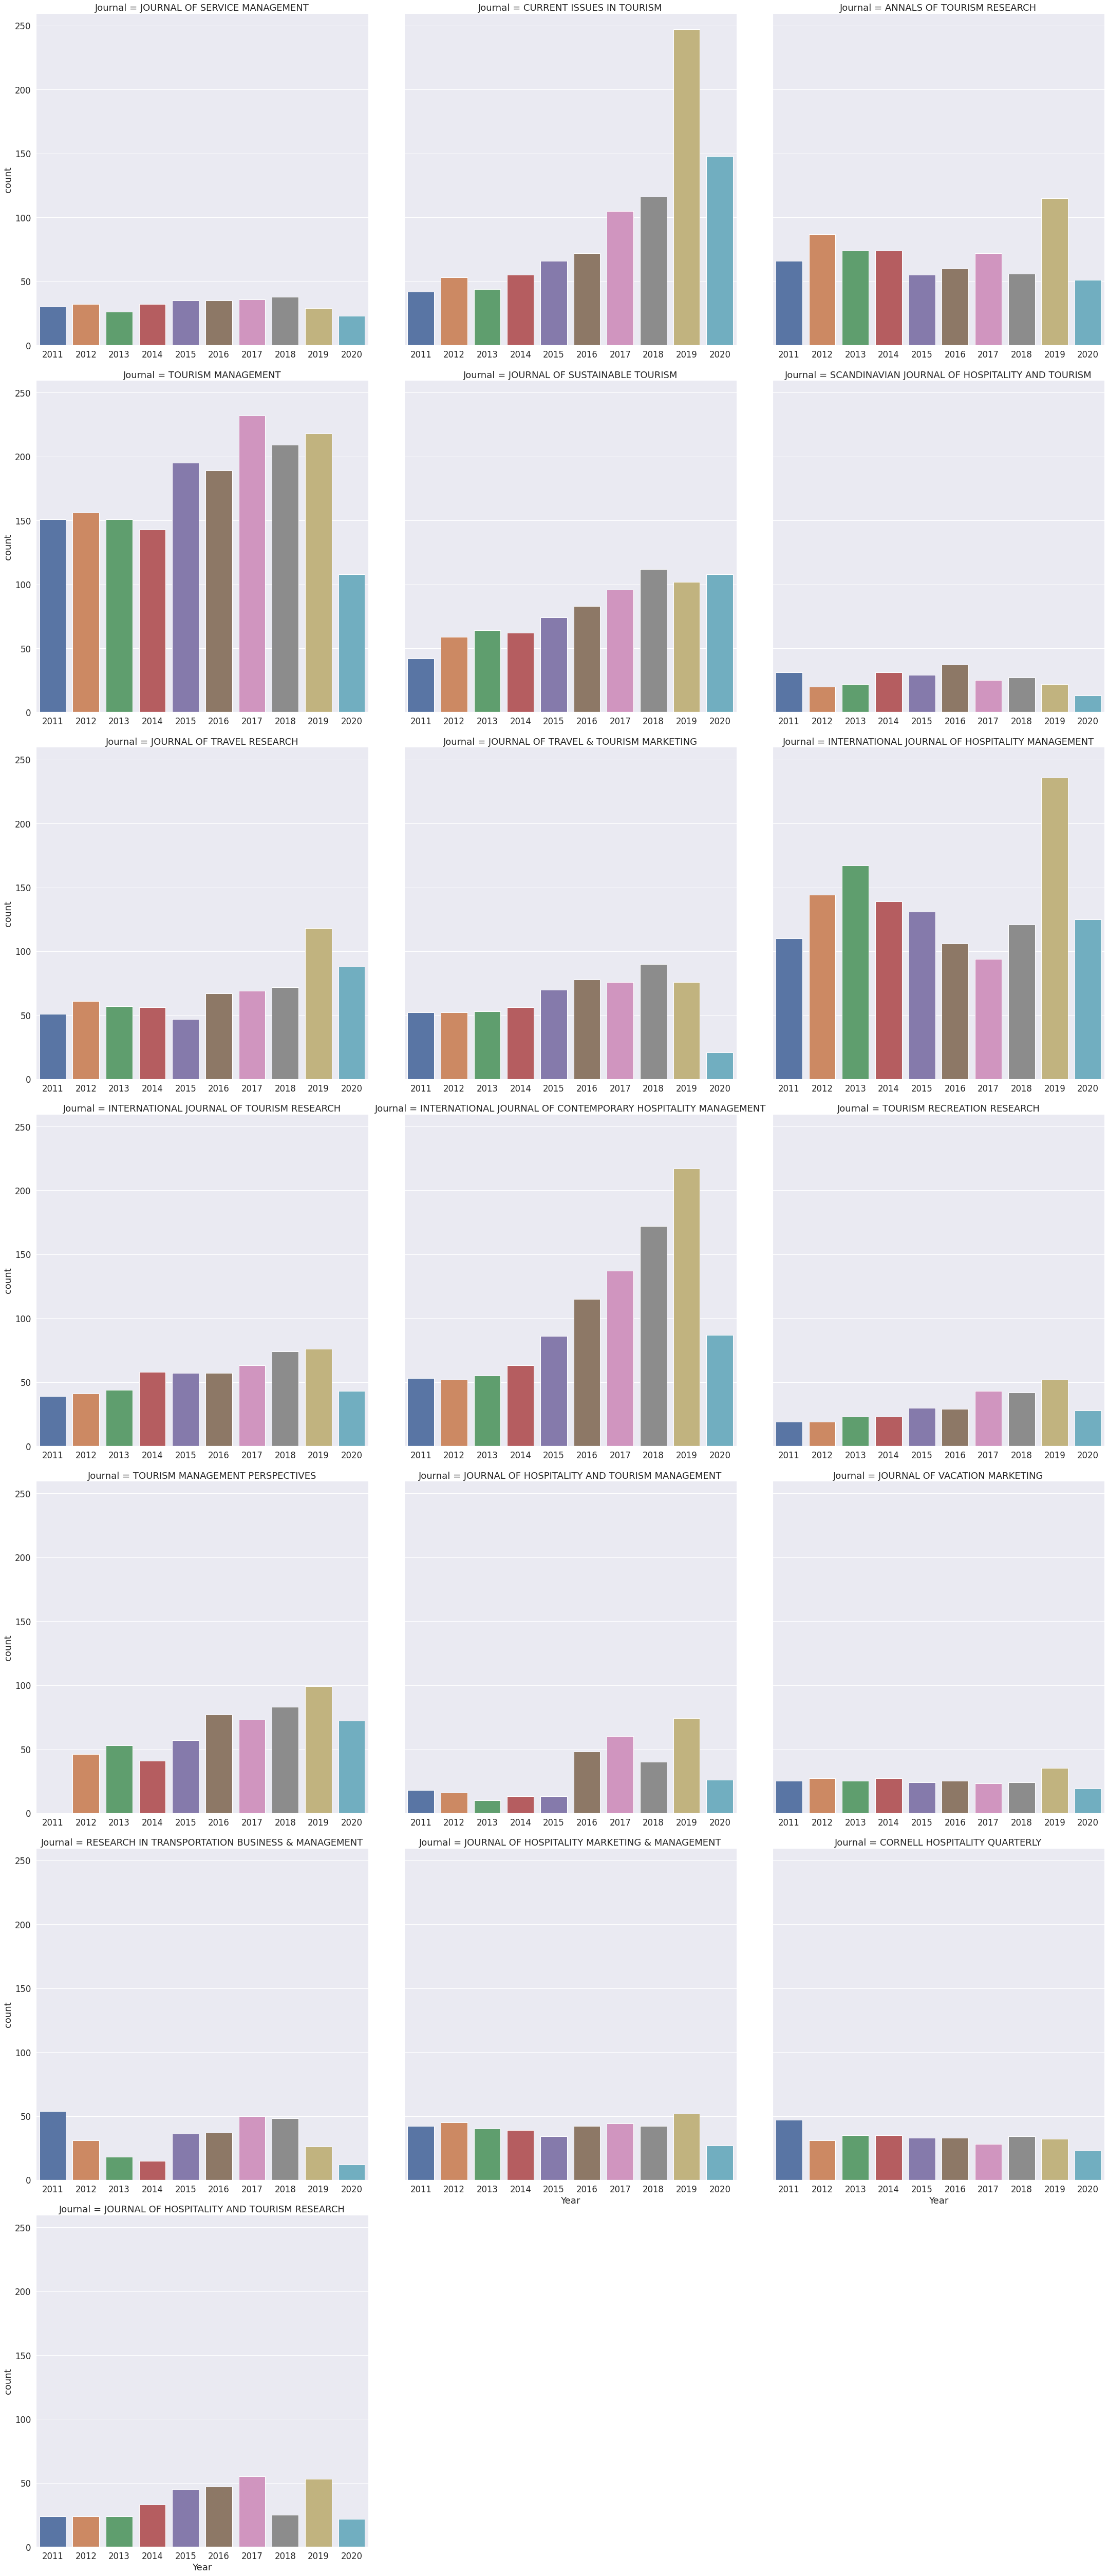

In [ ]:
sns.set(font_scale=1.5)

sns.catplot(data=df, x='Year', col="Journal", col_wrap=3, sharex=False, height=10, kind='count')


In [ ]:
papers = list(df.Abstract.values)

In [ ]:
len(papers)

11955

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# extension = ["model", "paper", "data", "approach", "research", "result","travel",
#              "tourism", "tourist", "hospitality", "result", "purpose",  "study",
#              "analysis", "problem", "use", "approach", "different",
#              "propose", "system", "industry", "role", "destination", "social"]

In [ ]:
stop_words = nltk.corpus.stopwords.words('english')

In [ ]:
"hospitality" in stop_words

False

In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 2.4MB/s 
     |████████████████████████████████| 552kB 12.7MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=7ce8ce3b8d2ac56944ac792b53f7a83e07312ba782bcf794ba7954c46eaba3a4
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=c8e8e3dad2a529cf28f70d74123932fd014b520350d7b7282e5239e78227bdaf
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [ ]:
#!python -m spacy download en_core_web_md

In [ ]:
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy
nlp = spacy.load('en_core_web_sm')

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt

### Tokenize Sentences and Clean

In [ ]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert to list
data = papers
data_words = list(sent_to_words(data))
print(data_words[:1])

[['purpose', 'this', 'article', 'examines', 'the', 'new', 'phenomenon', 'of', 'the', 'convergence', 'of', 'platform', 'and', 'pipeline', 'business', 'models', 'it', 'examines', 'the', 'potential', 'synergies', 'and', 'challenges', 'for', 'platforms', 'to', 'add', 'pipeline', 'components', 'and', 'vice', 'versa', 'for', 'pipeline', 'businesses', 'design', 'methodology', 'approach', 'this', 'paper', 'uses', 'conceptual', 'approach', 'that', 'synthesizes', 'and', 'integrates', 'the', 'literature', 'from', 'service', 'hospitality', 'and', 'strategy', 'and', 'supplements', 'them', 'with', 'two', 'illustrative', 'mini', 'case', 'studies', 'findings', 'while', 'the', 'extant', 'literature', 'typically', 'focuses', 'on', 'the', 'dichotomy', 'between', 'incumbent', 'pipeline', 'businesses', 'that', 'create', 'value', 'by', 'controlling', 'linear', 'series', 'of', 'activities', 'and', 'network', 'effects', 'driven', 'platforms', 'we', 'differentiate', 'between', 'two', 'types', 'of', 'platform',

### Build the Bigram, Trigram Models and Lemmatize

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=20, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# !python3 -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags and len(token.text)>3])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
# stop_words = nltk.corpus.stopwords.words('english')

In [ ]:
data_ready = process_words(data_words)  # processed Text Data!

### Create the Dictionary and Corpus needed for Topic Modeling

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

print('Sample word to number mappings:', list(id2word.items())[:15])
print('Total Vocabulary Size:', len(id2word))

Sample word to number mappings: [(0, 'activity'), (1, 'adopt'), (2, 'also'), (3, 'approach'), (4, 'article'), (5, 'asset'), (6, 'business'), (7, 'case'), (8, 'challenge'), (9, 'characteristic'), (10, 'common'), (11, 'component'), (12, 'conceptual'), (13, 'conceptualize'), (14, 'consideration')]
Total Vocabulary Size: 17553


In [ ]:
# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

In [ ]:
dict_corpus = {}

for i in range(len(corpus)):
  for idx, freq in corpus[i]:
    if id2word[idx] in dict_corpus:
      dict_corpus[id2word[idx]] += freq
    else:
       dict_corpus[id2word[idx]] = freq


In [ ]:
dict_corpus

{'activity': 1821,
 'adopt': 910,
 'also': 3985,
 'approach': 2724,
 'article': 1603,
 'asset': 213,
 'business': 2093,
 'case': 1294,
 'challenge': 1000,
 'characteristic': 1162,
 'common': 383,
 'component': 491,
 'conceptual': 763,
 'conceptualize': 154,
 'consideration': 286,
 'contrast': 260,
 'control': 637,
 'convergence': 55,
 'create': 1041,
 'define': 397,
 'develop': 2950,
 'dichotomy': 25,
 'different': 2868,
 'differentiate': 159,
 'drive': 592,
 'effect': 5368,
 'embark': 11,
 'encounter': 429,
 'entail': 45,
 'examine': 4385,
 'extant': 174,
 'extension': 65,
 'finally': 476,
 'finding': 5818,
 'first': 1558,
 'focus': 2101,
 'furthermore': 581,
 'help': 976,
 'hospitality': 3260,
 'identify': 3077,
 'illustrative': 24,
 'implication': 4373,
 'incumbent': 20,
 'likely': 575,
 'literature': 2424,
 'manager': 2261,
 'many': 1002,
 'mini': 7,
 'minor': 21,
 'mitigate': 158,
 'model': 5447,
 'move': 155,
 'natural': 533,
 'network': 1036,
 'offer': 1454,
 'paper': 5505,
 'pa

In [ ]:
dict_df = pd.DataFrame.from_dict(dict_corpus, orient='index', columns=['freq'])

In [ ]:
dict_df

freq
activity      1821
adopt          910
also          3985
approach      2724
article       1603
...            ...
incentice        2
canvass          2
yearround        2
runway           4
multiservice     2

[17553 rows x 1 columns]

In [ ]:
dict_df.loc['qualitative']

freq    847
Name: qualitative, dtype: int64

In [ ]:
dict_df[dict_df.freq>2000].sort_values('freq', ascending=False).head(50)

freq
tourism       17296
study         16539
tourist        8151
hotel          7650
research       7644
use            7221
result         7002
service        6980
customer       6051
destination    6044
finding        5818
experience     5601
paper          5505
model          5447
effect         5368
relationship   4846
base           4692
examine        4385
implication    4373
provide        4158
influence      4099
also           3985
industry       3972
impact         3931
value          3916
travel         3901
analysis       3663
social         3587
satisfaction   3551
employee       3540
show           3473
development    3323
hospitality    3260
factor         3239
datum          3214
perceive       3130
performance    3081
identify       3077
purpose        3061
management     3054
develop        2950
role           2935
level          2904
different      2868
consumer       2839
find           2725
approach       2724
high           2661
suggest        2630
behavior       2601

In [ ]:
extension = dict_df[dict_df.freq>2000].index.tolist()

In [ ]:
sns.set(font_scale=1)

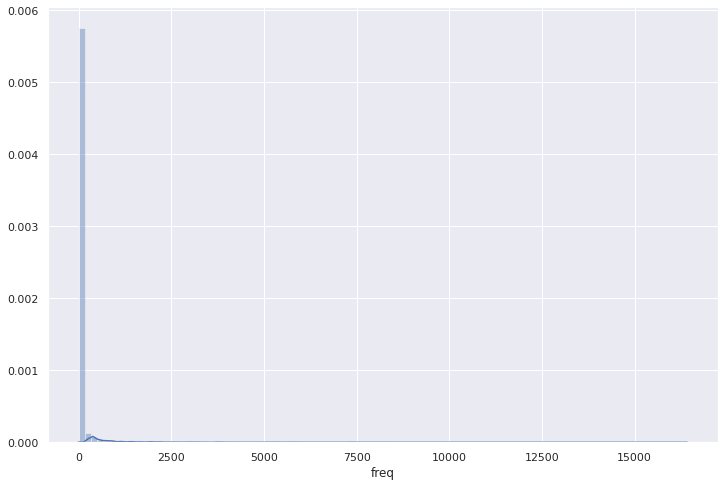

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.distplot(dict_df['freq'], bins=100);

In [ ]:
dict_df.loc['context']

freq    1832
Name: context, dtype: int64

In [ ]:
extension

['also',
 'approach',
 'develop',
 'different',
 'effect',
 'examine',
 'finding',
 'focus',
 'hospitality',
 'identify',
 'implication',
 'literature',
 'manager',
 'model',
 'paper',
 'provide',
 'purpose',
 'service',
 'strategy',
 'study',
 'suggest',
 'use',
 'value',
 'behavior',
 'customer',
 'employee',
 'factor',
 'high',
 'important',
 'influence',
 'management',
 'quality',
 'consumer',
 'datum',
 'find',
 'increase',
 'indicate',
 'investigate',
 'relate',
 'research',
 'test',
 'base',
 'experience',
 'explore',
 'industry',
 'positive',
 'result',
 'satisfaction',
 'analysis',
 'development',
 'role',
 'well',
 'work',
 'hotel',
 'impact',
 'performance',
 'process',
 'show',
 'significant',
 'social',
 'perceive',
 'relationship',
 'intention',
 'market',
 'perception',
 'brand',
 'level',
 'economic',
 'tourism',
 'destination',
 'travel',
 'local',
 'restaurant',
 'tourist',
 'visitor']

In [ ]:
stop_words.extend(extension)

In [ ]:
data_ready = process_words(data_words)

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

print('Sample word to number mappings:', list(id2word.items())[:15])
print('Total Vocabulary Size:', len(id2word))

Sample word to number mappings: [(0, 'activity'), (1, 'adopt'), (2, 'article'), (3, 'asset'), (4, 'business'), (5, 'case'), (6, 'challenge'), (7, 'characteristic'), (8, 'common'), (9, 'component'), (10, 'conceptual'), (11, 'conceptualize'), (12, 'consideration'), (13, 'contrast'), (14, 'control')]
Total Vocabulary Size: 17116


In [ ]:
# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

In [ ]:
dict_corpus_1 = {}

for i in range(10874):
  for idx, freq in corpus[i]:
    if id2word[idx] in dict_corpus_1:
      dict_corpus_1[id2word[idx]] += freq
    else:
       dict_corpus_1[id2word[idx]] = freq

In [ ]:
dict_df_1 = pd.DataFrame.from_dict(dict_corpus_1, orient='index', columns=['freq'])

In [ ]:
extension_1 = dict_df_1[dict_df_1.freq>2000].index.tolist()

In [ ]:
extension_1

['theory']

In [ ]:
dict_df_1.loc['context']

freq    1762
Name: context, dtype: int64

In [ ]:
print('Total Vocabulary Size:', len(id2word))

Total Vocabulary Size: 17116


We removed all terms that occur fewer than 20 times across all documents and all
terms that occur in more than 60% of all the documents. We are interested in finding different themes and topics and not recurring themes. Hence, this suits our scenario perfectly. We can now perform feature engineering by leveraging a simple Bag of Words model.

In [ ]:
# Filter out words that occur less than 20 documents, or more than 50% of the documents.

id2word.filter_extremes(no_below=20, no_above=0.5)

print('Total Vocabulary Size:', len(id2word))

Total Vocabulary Size: 2853


In [ ]:
# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

In [ ]:
len(corpus)

11385

### Build the Topic Model

In [ ]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip

--2020-06-15 11:46:25--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  5.64MB/s    in 2.7s    

2020-06-15 11:46:29 (5.64 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]



In [ ]:
!unzip mallet-2.0.8.zip

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.0.8/bin/csv2vectors  
  inflating: mallet-2.0.8/bin/mallet  
  inflating: mallet-2.0.8/bin/mallet.bat  
  inflating: mallet-2.0.8/bin/mallethon  
  inflating: mallet-2.0.8/bin/prepend-license.sh  
  inflating: mallet-2.0.8/bin/svmlight2vectors  
  inflating: mallet-2.0.8/bin/text2classify  
  inflating: mallet-2.0.8/bin/text2vectors  
  inflating: mallet-2.0.8/bin/vectors2classify  
  inflating: mallet-2.0.8/bin/vectors2info  
  inflating: mallet-2.0.8/bin/vectors2topics  
  inflating: mallet-2.0.8/bin/vectors2vectors  
  inflating: mallet-2.0.8/build.xml  
   creating: mallet-2.0.8/class/
   creating: mallet-2.0.8/class/cc/
   creating: mallet-2.0.8/class/cc/mallet/
   creating: mallet-2.0.8/class/cc/mallet/classify/
  inflating: mallet-2.0.8/class/cc/mallet/classify/AdaBoost.class  
  in

In [ ]:
mallet_path = '/content/mallet-2.0.8/bin/mallet'

In [ ]:
ldamallet = gensim.models.wrappers.LdaMallet( mallet_path, corpus=corpus, num_topics=10, id2word=id2word)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_ready, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(0,
  [('image', 0.0315360264262611),
   ('affect', 0.028731677104122222),
   ('loyalty', 0.02642626109696511),
   ('support', 0.02496387034615649),
   ('risk', 0.024705801390131444),
   ('negative', 0.023914389924987955),
   ('moderate', 0.020628311884935656),
   ('attitude', 0.020525084302525635),
   ('theory', 0.020043355584612208),
   ('theoretical', 0.019819695822723832)]),
 (1,
  [('information', 0.0351949342856091),
   ('marketing', 0.03512130471597393),
   ('online', 0.03239701063947281),
   ('review', 0.028016051246180465),
   ('attribute', 0.02635938592938924),
   ('product', 0.02484997975186835),
   ('traveler', 0.018444207193608952),
   ('medium', 0.018444207193608952),
   ('type', 0.017229319294628724),
   ('decision', 0.016216912712145197)]),
 (2,
  [('group', 0.03480541706972245),
   ('activity', 0.03238708237220031),
   ('difference', 0.02327182082000149),
   ('motivation', 0.022806756455093384),
   ('visit', 0.02278815388049706),
   ('guest', 0.021597589106332315),
  

In [ ]:
# pickle.dump(ldamallet, open("drive/My Drive/Topic_Modeling/lda_mallet_10.pkl", "wb"))

In [ ]:
# ldamallet = pickle.load(open("drive/My Drive/Topic_Modeling/lda_mallet_10.pkl", "rb"))

In [ ]:
tm_results = ldamallet[corpus]

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


We can now get the most dominant topic per research paper with some intelligent sorting and indexing using the following code.

In [ ]:
tm_results

[[(0, 0.05344585091420535),
  (1, 0.10126582278481014),
  (2, 0.1448663853727145),
  (3, 0.07313642756680733),
  (4, 0.07665260196905768),
  (5, 0.05766526019690577),
  (6, 0.042897327707454296),
  (7, 0.32278481012658233),
  (8, 0.03445850914205345),
  (9, 0.0928270042194093)],
 [(0, 0.14537037037037037),
  (1, 0.15925925925925927),
  (2, 0.10092592592592593),
  (3, 0.07314814814814814),
  (4, 0.09259259259259259),
  (5, 0.14537037037037037),
  (6, 0.09074074074074075),
  (7, 0.08981481481481482),
  (8, 0.046296296296296294),
  (9, 0.05648148148148148)],
 [(0, 0.09245742092457422),
  (1, 0.05920519059205191),
  (2, 0.20924574209245744),
  (3, 0.06244931062449311),
  (4, 0.09083536090835362),
  (5, 0.06731549067315493),
  (6, 0.14436334144363344),
  (7, 0.14193025141930254),
  (8, 0.08029197080291972),
  (9, 0.051905920519059214)],
 [(0, 0.11111111111111112),
  (1, 0.13137254901960788),
  (2, 0.04444444444444445),
  (3, 0.1797385620915033),
  (4, 0.09869281045751635),
  (5, 0.093464052

In [ ]:
len(tm_results)

11385

In [ ]:
df_e = pd.DataFrame.from_records([{v: k for v, k in row} for row in tm_results])
df_e.columns = ['Topic ' + str(i) for i in range(1,11)]
df_e

Topic 1   Topic 2   Topic 3  ...   Topic 8   Topic 9  Topic 10
0      0.053446  0.101266  0.144866  ...  0.322785  0.034459  0.092827
1      0.145370  0.159259  0.100926  ...  0.089815  0.046296  0.056481
2      0.092457  0.059205  0.209246  ...  0.141930  0.080292  0.051906
3      0.111111  0.131373  0.044444  ...  0.095425  0.034641  0.037255
4      0.058288  0.254098  0.050091  ...  0.139344  0.066485  0.053734
...         ...       ...       ...  ...       ...       ...       ...
11380  0.086142  0.063670  0.177278  ...  0.073658  0.119850  0.091136
11381  0.079532  0.088889  0.141520  ...  0.059649  0.059649  0.061988
11382  0.068273  0.124498  0.074967  ...  0.121821  0.095047  0.137885
11383  0.097222  0.115079  0.089286  ...  0.089286  0.089286  0.134921
11384  0.085795  0.094233  0.108298  ...  0.084388  0.090014  0.137834

[11385 rows x 10 columns]

In [ ]:
df_e['Year'] = df.Year

In [ ]:
df_e

Topic 1   Topic 2   Topic 3  ...   Topic 9  Topic 10  Year
0      0.053446  0.101266  0.144866  ...  0.034459  0.092827  2020
1      0.145370  0.159259  0.100926  ...  0.046296  0.056481  2020
2      0.092457  0.059205  0.209246  ...  0.080292  0.051906  2020
3      0.111111  0.131373  0.044444  ...  0.034641  0.037255  2020
4      0.058288  0.254098  0.050091  ...  0.066485  0.053734  2020
...         ...       ...       ...  ...       ...       ...   ...
11380  0.086142  0.063670  0.177278  ...  0.119850  0.091136  2012
11381  0.079532  0.088889  0.141520  ...  0.059649  0.061988  2012
11382  0.068273  0.124498  0.074967  ...  0.095047  0.137885  2012
11383  0.097222  0.115079  0.089286  ...  0.089286  0.134921  2012
11384  0.085795  0.094233  0.108298  ...  0.090014  0.137834  2012

[11385 rows x 11 columns]

In [ ]:
df_e.groupby('Year').describe()

Topic 1                      ...  Topic 10                    
       count      mean       std  ...       50%       75%       max
Year                              ...                              
2011   799.0  0.101104  0.048438  ...  0.082990  0.120989  0.355728
2012   953.0  0.099181  0.045514  ...  0.084967  0.127341  0.409357
2013   922.0  0.099646  0.045828  ...  0.083193  0.117705  0.346405
2014   939.0  0.100261  0.045224  ...  0.083608  0.125333  0.385874
2015  1000.0  0.097054  0.045738  ...  0.080419  0.112438  0.412214
2016  1190.0  0.097043  0.043223  ...  0.082702  0.120594  0.426202
2017  1326.0  0.096753  0.044381  ...  0.082989  0.124569  0.391727
2018  1402.0  0.096174  0.041947  ...  0.079929  0.117138  0.409722
2019  1830.0  0.097465  0.043951  ...  0.081019  0.116220  0.336364
2020  1024.0  0.097245  0.043795  ...  0.082626  0.117929  0.395623

[10 rows x 80 columns]

In [ ]:
df_e['Journal'] = df.Journal

In [ ]:
df_e.groupby(['Journal', 'Year']).describe()

Topic 1            ...  Topic 10          
                                   count      mean  ...       75%       max
Journal                     Year                    ...                    
ANNALS OF TOURISM RESEARCH  2011    66.0  0.092547  ...  0.117870  0.242798
                            2012    87.0  0.095073  ...  0.115205  0.235609
                            2013    74.0  0.094153  ...  0.118513  0.220988
                            2014    74.0  0.094915  ...  0.117126  0.234205
                            2015    55.0  0.094762  ...  0.123352  0.201726
...                                  ...       ...  ...       ...       ...
TOURISM RECREATION RESEARCH 2016    29.0  0.091360  ...  0.140237  0.268362
                            2017    43.0  0.099192  ...  0.143979  0.256881
                            2018    42.0  0.096900  ...  0.151134  0.298377
                            2019    52.0  0.104258  ...  0.123433  0.227431
                            2020    28.0  0.105637  ...  0.145049  0.269476

[171 rows x 80 columns]

In [ ]:
df_e.groupby('Year').mean()

Topic 1   Topic 2   Topic 3  ...   Topic 8   Topic 9  Topic 10
Year                                ...                              
2011  0.101104  0.094931  0.097074  ...  0.103559  0.101771  0.101391
2012  0.099181  0.097192  0.095707  ...  0.103812  0.100031  0.106927
2013  0.099646  0.095751  0.098798  ...  0.099035  0.098831  0.101329
2014  0.100261  0.097918  0.096913  ...  0.098328  0.101246  0.102511
2015  0.097054  0.097634  0.101520  ...  0.104216  0.103982  0.098398
2016  0.097043  0.101797  0.101137  ...  0.096515  0.097467  0.101058
2017  0.096753  0.099426  0.097747  ...  0.095077  0.102792  0.104402
2018  0.096174  0.105867  0.097286  ...  0.095558  0.098741  0.099494
2019  0.097465  0.102384  0.100502  ...  0.095328  0.102642  0.097929
2020  0.097245  0.102918  0.099451  ...  0.095771  0.100266  0.100806

[10 rows x 10 columns]

In [ ]:
df_jy = df_e.groupby(['Journal', 'Year']).mean()

In [ ]:
df_jy

Topic 1   Topic 2  ...   Topic 9  Topic 10
Journal                     Year                      ...                    
ANNALS OF TOURISM RESEARCH  2011  0.092547  0.100155  ...  0.090357  0.102119
                            2012  0.095073  0.107270  ...  0.091250  0.097738
                            2013  0.094153  0.107401  ...  0.084012  0.100408
                            2014  0.094915  0.104038  ...  0.099860  0.097296
                            2015  0.094762  0.092723  ...  0.089770  0.100752
...                                    ...       ...  ...       ...       ...
TOURISM RECREATION RESEARCH 2016  0.091360  0.104645  ...  0.082306  0.115220
                            2017  0.099192  0.107314  ...  0.074856  0.115869
                            2018  0.096900  0.100255  ...  0.084400  0.122462
                            2019  0.104258  0.108509  ...  0.087812  0.104234
                            2020  0.105637  0.102051  ...  0.087734  0.119823

[171 rows x 10 columns]

In [ ]:
df_e.drop(['Year', 'Journal'], axis=1, inplace=True)

In [ ]:
df_e['Max'] = df_e.idxmax(axis=1)

In [ ]:
df_e['Year']= df.Year; df_e['Journal']=df.Journal

In [ ]:
df_e

Topic 1   Topic 2  ...  Year                          Journal
0      0.053446  0.101266  ...  2020    JOURNAL OF SERVICE MANAGEMENT
1      0.145370  0.159259  ...  2020    JOURNAL OF SERVICE MANAGEMENT
2      0.092457  0.059205  ...  2020    JOURNAL OF SERVICE MANAGEMENT
3      0.111111  0.131373  ...  2020    JOURNAL OF SERVICE MANAGEMENT
4      0.058288  0.254098  ...  2020    JOURNAL OF SERVICE MANAGEMENT
...         ...       ...  ...   ...                              ...
11380  0.086142  0.063670  ...  2012  TOURISM MANAGEMENT PERSPECTIVES
11381  0.079532  0.088889  ...  2012  TOURISM MANAGEMENT PERSPECTIVES
11382  0.068273  0.124498  ...  2012  TOURISM MANAGEMENT PERSPECTIVES
11383  0.097222  0.115079  ...  2012  TOURISM MANAGEMENT PERSPECTIVES
11384  0.085795  0.094233  ...  2012  TOURISM MANAGEMENT PERSPECTIVES

[11385 rows x 13 columns]

In [ ]:
df_e.Max.value_counts()

Topic 7     1613
Topic 10    1390
Topic 9     1305
Topic 5     1273
Topic 3     1163
Topic 6     1047
Topic 2      987
Topic 1      940
Topic 8      881
Topic 4      786
Name: Max, dtype: int64

In [ ]:
df_count = df_e.groupby('Year')['Max'].value_counts().unstack()

In [ ]:
df_count['Total'] = df_count.sum(axis=1)


In [ ]:
df_count

Max   Topic 1  Topic 10  Topic 2  Topic 3  ...  Topic 7  Topic 8  Topic 9  Total
Year                                       ...                                  
2011       80       105       59       64  ...       78       82       92    799
2012       98       133       72       77  ...       97      104       98    953
2013       74       117       63       98  ...      131       86       95    922
2014       81       114       76       97  ...      124       72      103    939
2015       86       117       81      118  ...      116       99      131   1000
2016       85       144       97      135  ...      162       79      129   1190
2017      111       186      113      127  ...      183       83      161   1326
2018       99       155      165      131  ...      213       88      151   1402
2019      146       201      163      203  ...      316      117      229   1830
2020       80       118       98      113  ...      193       71      116   1024

[10 rows x 11 columns]

In [ ]:
df_count = df_e.groupby('Year')['Max'].value_counts(normalize=True).unstack()
df_count['Total'] = df_count.sum(axis=1)
df_count

Max    Topic 1  Topic 10   Topic 2  ...   Topic 8   Topic 9  Total
Year                                ...                           
2011  0.100125  0.131414  0.073842  ...  0.102628  0.115144    1.0
2012  0.102833  0.139559  0.075551  ...  0.109129  0.102833    1.0
2013  0.080260  0.126898  0.068330  ...  0.093275  0.103037    1.0
2014  0.086262  0.121406  0.080937  ...  0.076677  0.109691    1.0
2015  0.086000  0.117000  0.081000  ...  0.099000  0.131000    1.0
2016  0.071429  0.121008  0.081513  ...  0.066387  0.108403    1.0
2017  0.083710  0.140271  0.085219  ...  0.062594  0.121418    1.0
2018  0.070613  0.110556  0.117689  ...  0.062767  0.107703    1.0
2019  0.079781  0.109836  0.089071  ...  0.063934  0.125137    1.0
2020  0.078125  0.115234  0.095703  ...  0.069336  0.113281    1.0

[10 rows x 11 columns]

In [ ]:
df_count_j = df_e.groupby(['Journal', 'Year'])['Max'].value_counts(normalize=True).unstack()
df_count_j['Total'] = df_count_j.sum(axis=1)
df_j = df_count_j.reset_index()
df_j

Max                      Journal  Year   Topic 1  ...   Topic 8   Topic 9  Total
0     ANNALS OF TOURISM RESEARCH  2011  0.060606  ...  0.060606  0.045455    1.0
1     ANNALS OF TOURISM RESEARCH  2012  0.057471  ...  0.045977  0.091954    1.0
2     ANNALS OF TOURISM RESEARCH  2013  0.040541  ...  0.013514  0.027027    1.0
3     ANNALS OF TOURISM RESEARCH  2014  0.054054  ...  0.013514  0.108108    1.0
4     ANNALS OF TOURISM RESEARCH  2015  0.036364  ...  0.072727  0.054545    1.0
..                           ...   ...       ...  ...       ...       ...    ...
166  TOURISM RECREATION RESEARCH  2016       NaN  ...       NaN  0.034483    1.0
167  TOURISM RECREATION RESEARCH  2017  0.069767  ...       NaN       NaN    1.0
168  TOURISM RECREATION RESEARCH  2018  0.023810  ...  0.023810  0.095238    1.0
169  TOURISM RECREATION RESEARCH  2019  0.096154  ...  0.019231  0.076923    1.0
170  TOURISM RECREATION RESEARCH  2020  0.107143  ...  0.035714  0.071429    1.0

[171 rows x 13 columns]

In [ ]:
df_j_melted = df_j.melt(id_vars=['Journal', 'Year'], value_vars=['Topic ' + str(i) for i in range(1,11)], var_name='Topic', value_name='Prevelance')

In [ ]:
df_j_melted

Journal  Year     Topic  Prevelance
0      ANNALS OF TOURISM RESEARCH  2011   Topic 1    0.060606
1      ANNALS OF TOURISM RESEARCH  2012   Topic 1    0.057471
2      ANNALS OF TOURISM RESEARCH  2013   Topic 1    0.040541
3      ANNALS OF TOURISM RESEARCH  2014   Topic 1    0.054054
4      ANNALS OF TOURISM RESEARCH  2015   Topic 1    0.036364
...                           ...   ...       ...         ...
1705  TOURISM RECREATION RESEARCH  2016  Topic 10    0.137931
1706  TOURISM RECREATION RESEARCH  2017  Topic 10    0.162791
1707  TOURISM RECREATION RESEARCH  2018  Topic 10    0.190476
1708  TOURISM RECREATION RESEARCH  2019  Topic 10    0.134615
1709  TOURISM RECREATION RESEARCH  2020  Topic 10    0.107143

[1710 rows x 4 columns]

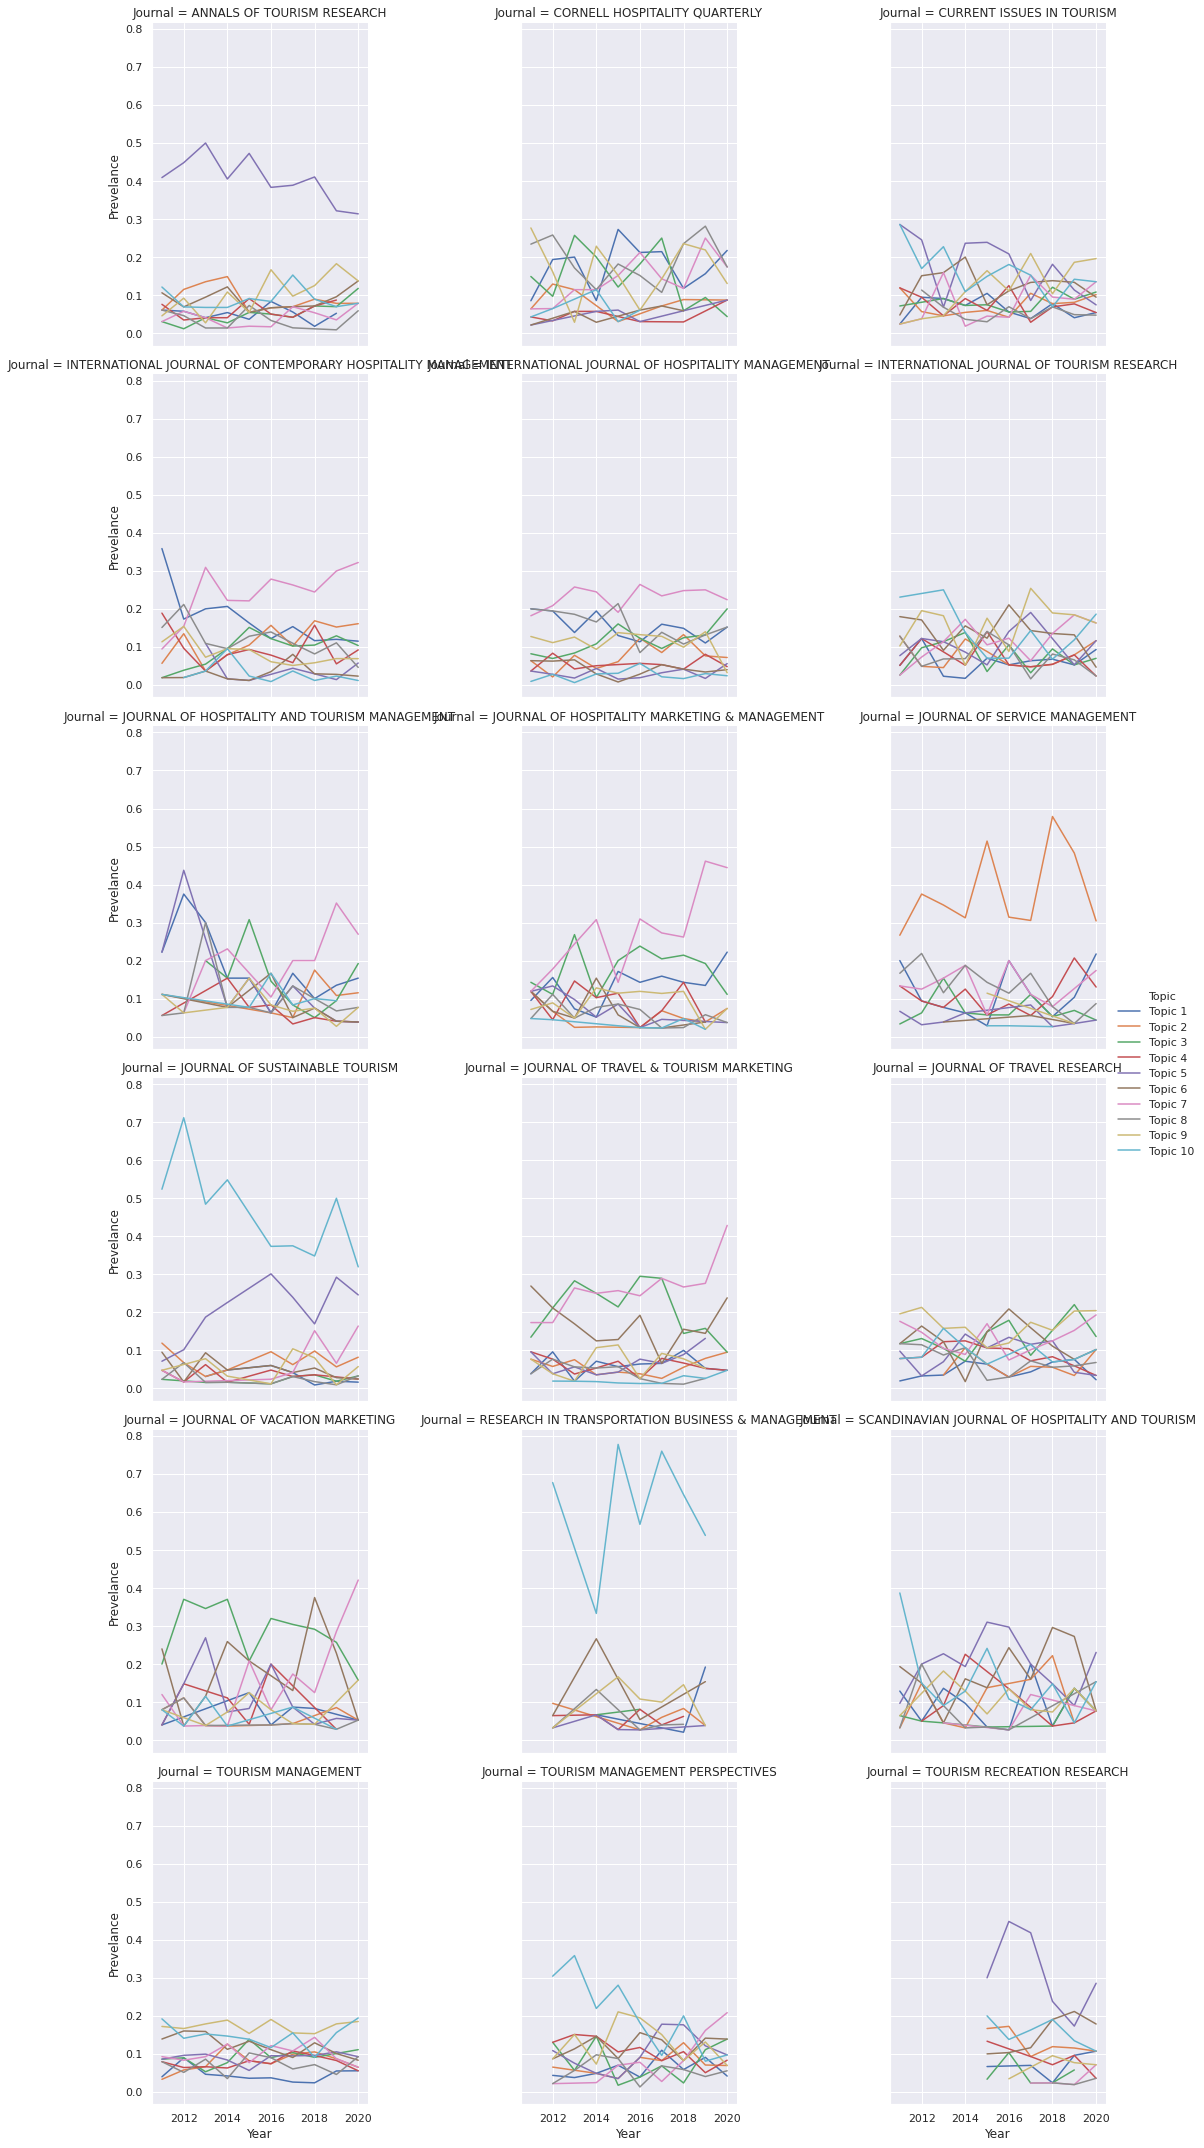

In [ ]:
sns.relplot(x='Year', y="Prevelance", col="Journal", col_wrap=3, hue='Topic',
data=df_j_melted,
kind="line",
style="Topic",
# markers=True)
dashes=False,
ci=None)

In [ ]:
df_count_j

Max                                Topic 1  Topic 10  ...   Topic 9  Total
Journal                     Year                      ...                 
ANNALS OF TOURISM RESEARCH  2011  0.060606  0.121212  ...  0.045455    1.0
                            2012  0.057471  0.068966  ...  0.091954    1.0
                            2013  0.040541  0.067568  ...  0.027027    1.0
                            2014  0.054054  0.067568  ...  0.108108    1.0
                            2015  0.036364  0.090909  ...  0.054545    1.0
...                                    ...       ...  ...       ...    ...
TOURISM RECREATION RESEARCH 2016       NaN  0.137931  ...  0.034483    1.0
                            2017  0.069767  0.162791  ...       NaN    1.0
                            2018  0.023810  0.190476  ...  0.095238    1.0
                            2019  0.096154  0.134615  ...  0.076923    1.0
                            2020  0.107143  0.107143  ...  0.071429    1.0

[171 rows x 11 columns]

In [ ]:
df_count_j.drop('Total', axis=1, inplace=True)

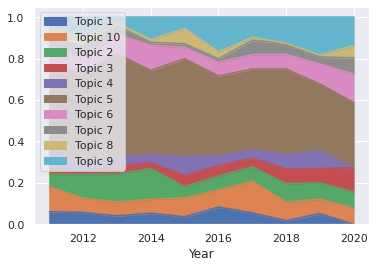

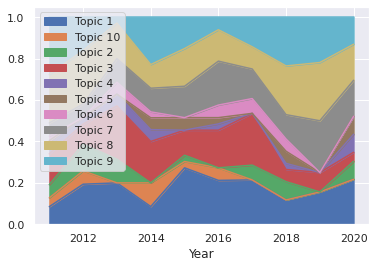

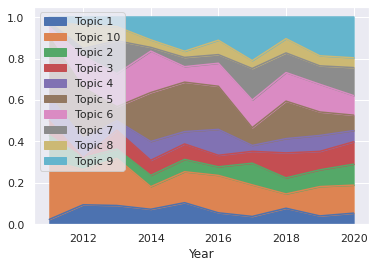

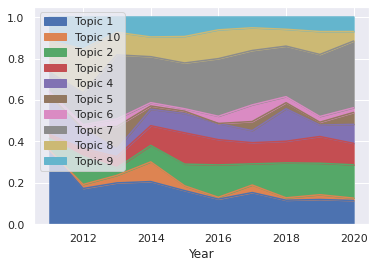

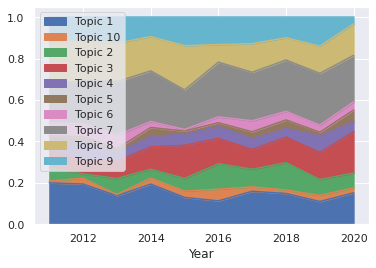

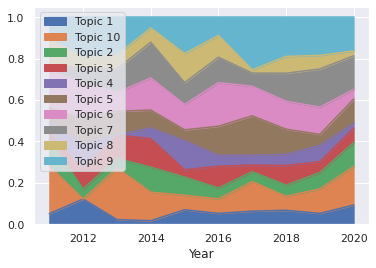

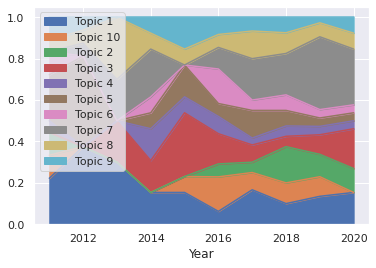

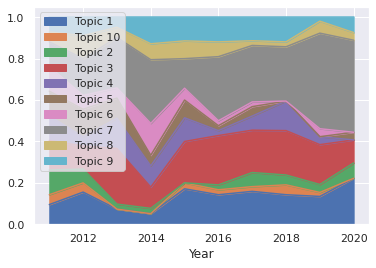

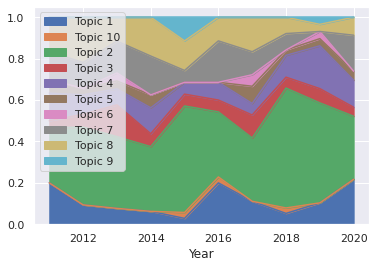

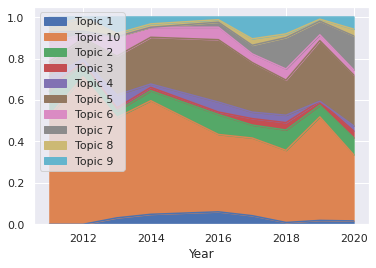

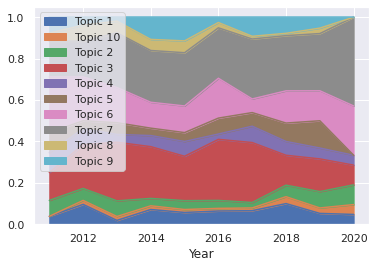

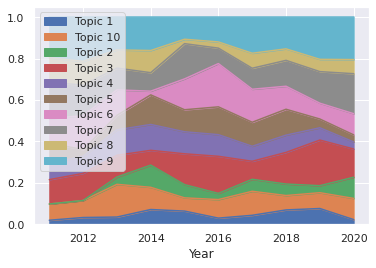

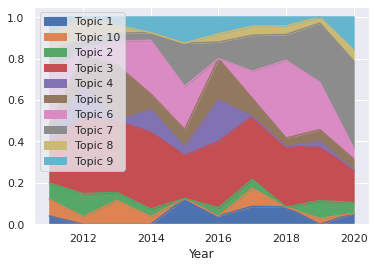

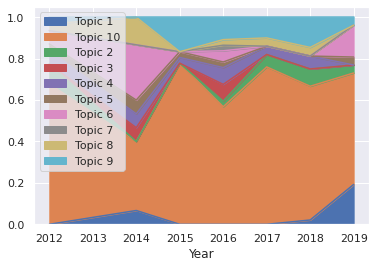

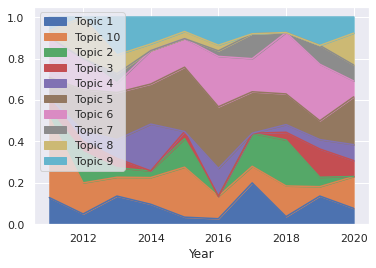

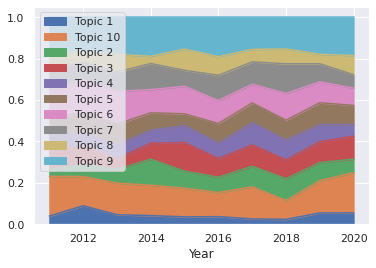

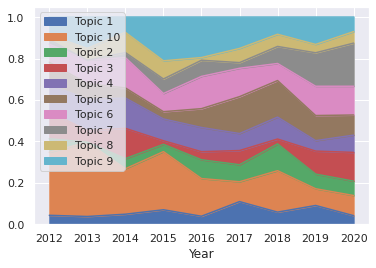

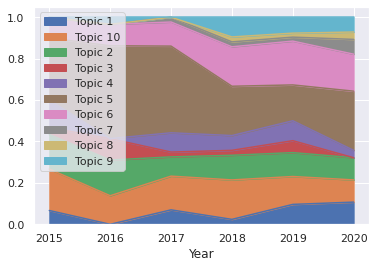

In [ ]:
for j in df_count_j.index.levels[0]:
  df_count_j.xs(j, level=0).plot.area()
  plt.legend(loc='upper left')
  plt.show()


In [ ]:
df_e

Topic 1   Topic 2  ...    Year                        Journal
0      0.092299  0.276308  ...  2020.0  JOURNAL OF SERVICE MANAGEMENT
1      0.097643  0.053872  ...  2020.0  JOURNAL OF SERVICE MANAGEMENT
2      0.083333  0.111111  ...  2020.0  JOURNAL OF SERVICE MANAGEMENT
3      0.104904  0.073246  ...  2020.0  JOURNAL OF SERVICE MANAGEMENT
4      0.136691  0.063149  ...  2020.0  JOURNAL OF SERVICE MANAGEMENT
...         ...       ...  ...     ...                            ...
10869  0.106280  0.155797  ...  2011.0  CORNELL HOSPITALITY QUARTERLY
10870  0.111111  0.217668  ...  2011.0  CORNELL HOSPITALITY QUARTERLY
10871  0.076253  0.093682  ...  2011.0  CORNELL HOSPITALITY QUARTERLY
10872  0.065873  0.096825  ...  2011.0  CORNELL HOSPITALITY QUARTERLY
10873  0.195767  0.067019  ...  2011.0  CORNELL HOSPITALITY QUARTERLY

[10874 rows x 13 columns]

In [ ]:
df_melted = df_e.melt(id_vars=['Journal', 'Year'], value_vars=['Topic ' + str(i) for i in range(1,11)], var_name='Topic', value_name='Weight')
df_melted

Journal    Year     Topic    Weight
0       JOURNAL OF SERVICE MANAGEMENT  2020.0   Topic 1  0.061931
1       JOURNAL OF SERVICE MANAGEMENT  2020.0   Topic 1  0.071759
2       JOURNAL OF SERVICE MANAGEMENT  2020.0   Topic 1  0.075758
3       JOURNAL OF SERVICE MANAGEMENT  2020.0   Topic 1  0.077413
4       JOURNAL OF SERVICE MANAGEMENT  2020.0   Topic 1  0.091954
...                               ...     ...       ...       ...
108735  CORNELL HOSPITALITY QUARTERLY  2011.0  Topic 10  0.100601
108736  CORNELL HOSPITALITY QUARTERLY  2011.0  Topic 10  0.073671
108737  CORNELL HOSPITALITY QUARTERLY  2011.0  Topic 10  0.109756
108738  CORNELL HOSPITALITY QUARTERLY  2011.0  Topic 10  0.058081
108739  CORNELL HOSPITALITY QUARTERLY  2011.0  Topic 10  0.071829

[108740 rows x 4 columns]

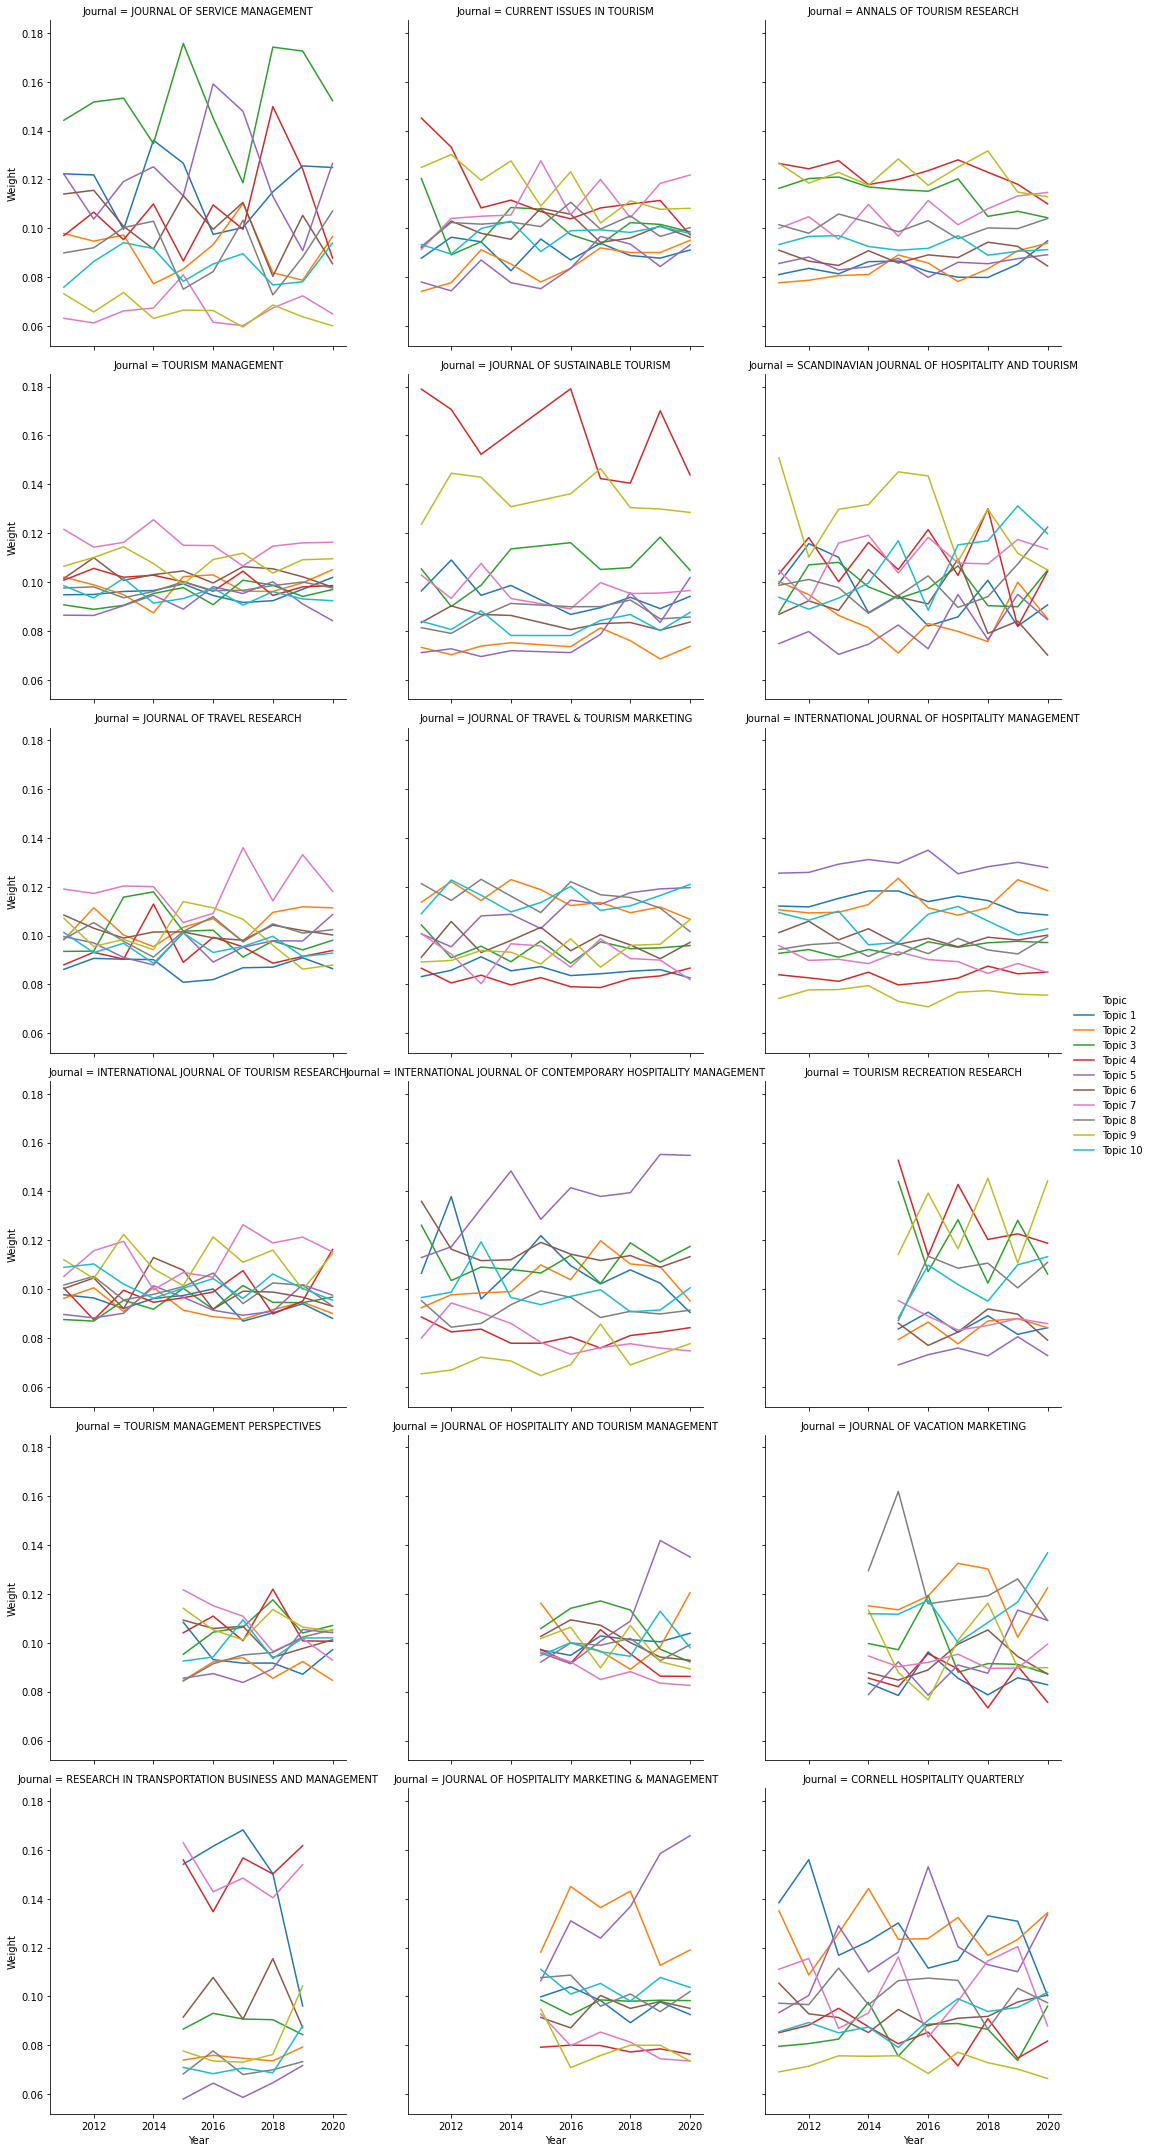

In [ ]:
# dash_styles = ["",
#                (4, 1.5), (2, 2), (3, 3), 
#                (1, 1),
#                (3, 1, 1.5, 1),
#                (5, 1, 1, 1),
#                (5, 1, 2, 1, 2, 1),
#                (2, 2, 3, 1.5),
#                (1, 2.5, 3, 1.2)]

sns.relplot(x='Year', y="Weight", col="Journal", col_wrap=3, hue='Topic',
data=df_melted,
kind="line",
style="Topic",
# markers=True)
dashes=False,
ci=None)

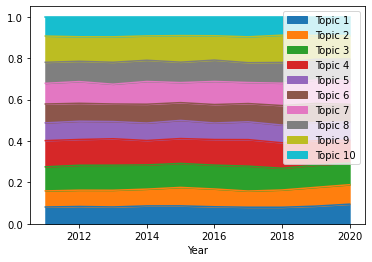

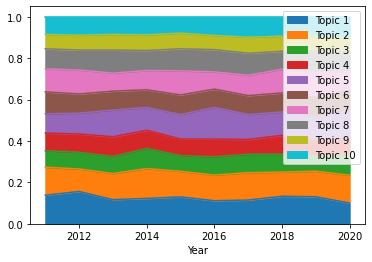

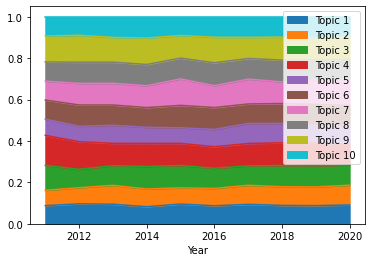

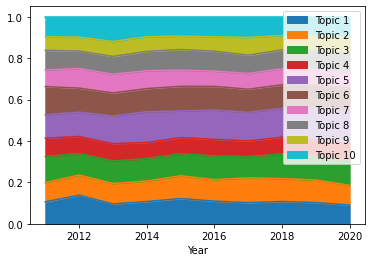

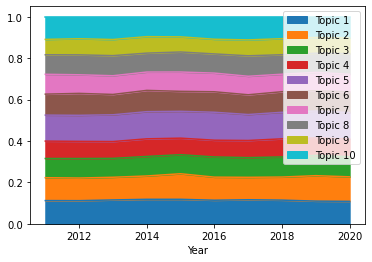

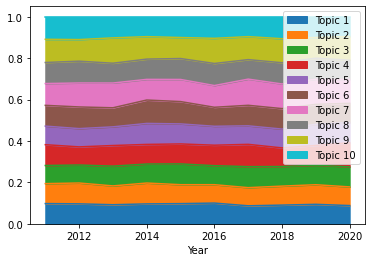

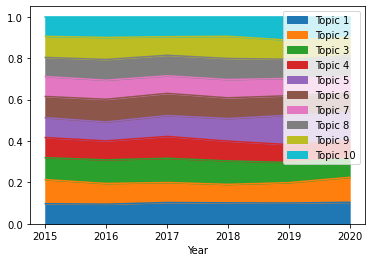

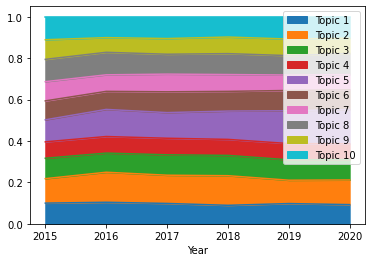

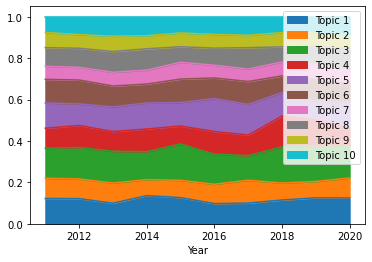

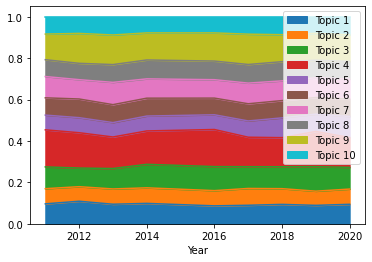

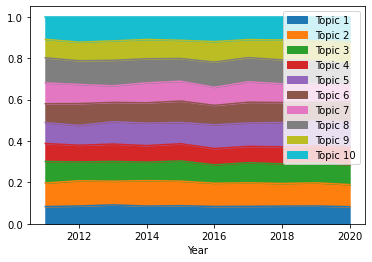

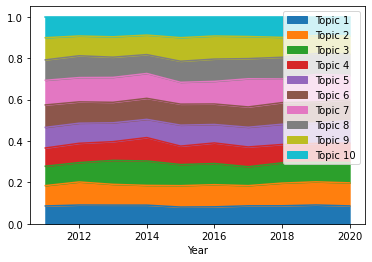

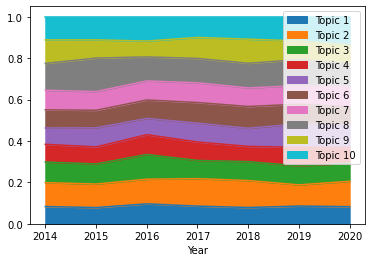

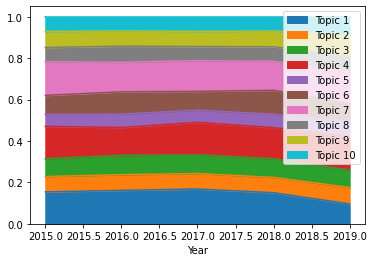

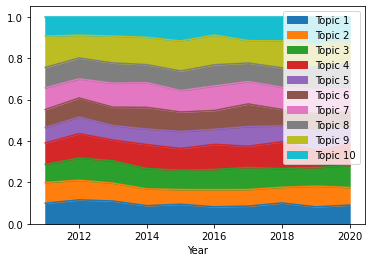

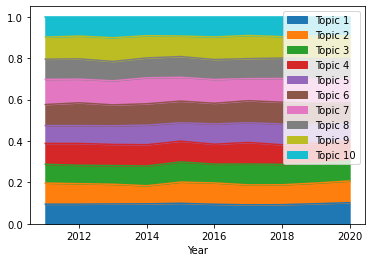

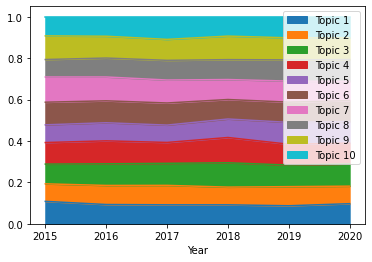

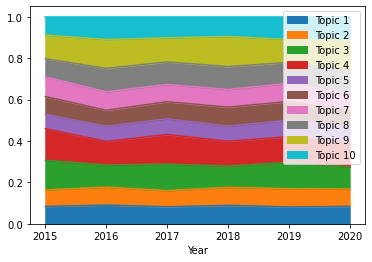

In [ ]:
for j in df_jy.index.levels[0]:
  df_jy.xs(j, level=0).plot.area()
  plt.legend(loc='upper right')
  plt.show()


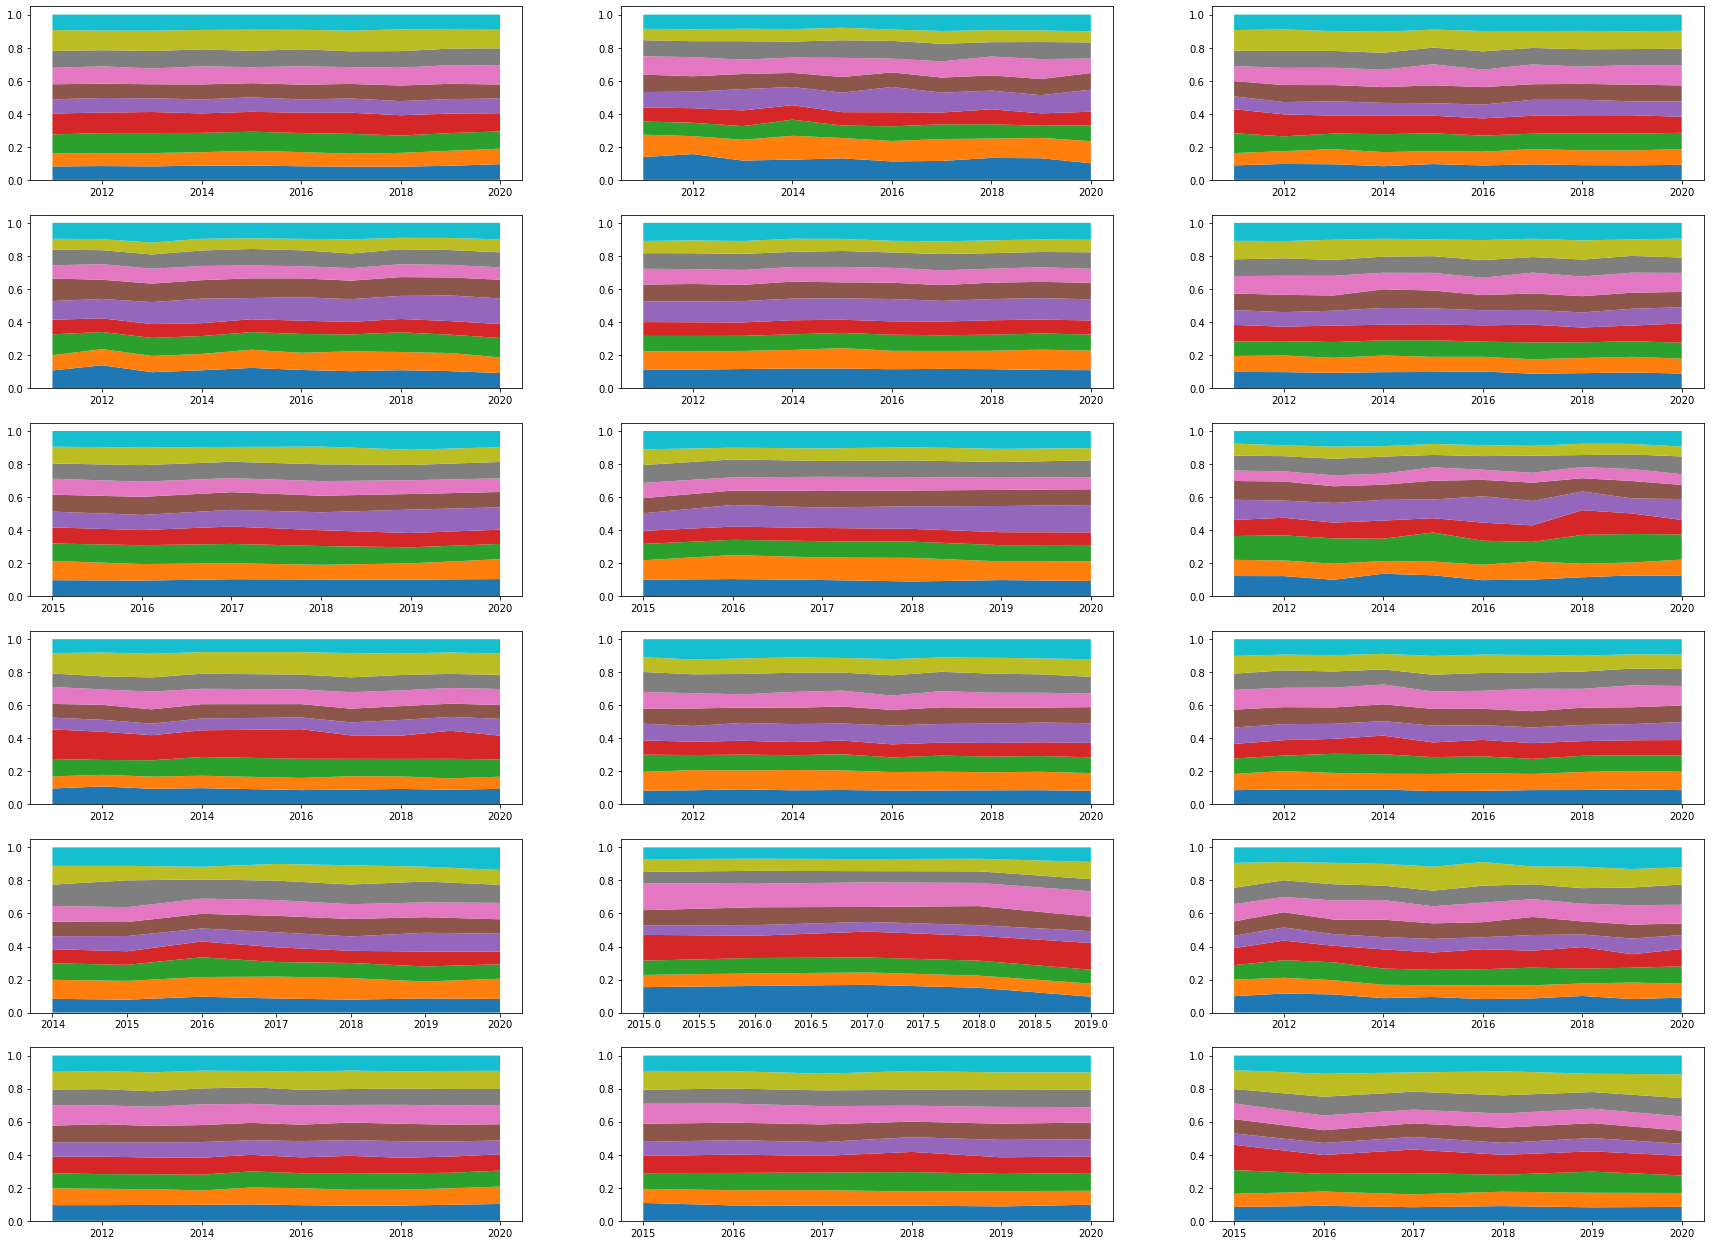

In [ ]:
plt.figure(figsize=(30,30))
for i, j in enumerate(df_jy.index.levels[0]):
  
  df_temp = df_jy.xs(j, level=0)
  plt.subplot(8, 3, i + 1)
  plt.stackplot(df_temp.index, df_temp['Topic 1'], df_temp['Topic 2'], df_temp['Topic 3'], df_temp['Topic 4'], df_temp['Topic 5'],
                                df_temp['Topic 6'], df_temp['Topic 7'], df_temp['Topic 8'], df_temp['Topic 9'], df_temp['Topic 10'])

plt.show()


In [ ]:
df_jy.xs(j, level=0)

Topic 1   Topic 2   Topic 3  ...   Topic 8   Topic 9  Topic 10
Year                                  ...                              
2015.0  0.083731  0.079398  0.144020  ...  0.087156  0.114321  0.088215
2016.0  0.090610  0.086565  0.107197  ...  0.113518  0.139307  0.109873
2017.0  0.082370  0.077651  0.128424  ...  0.108581  0.116540  0.101896
2018.0  0.089154  0.087017  0.102520  ...  0.110653  0.145410  0.095119
2019.0  0.081537  0.087974  0.128170  ...  0.100549  0.110746  0.110004
2020.0  0.084252  0.084211  0.106255  ...  0.110967  0.144282  0.113277

[6 rows x 10 columns]

In [ ]:
df_jy.index.levels

FrozenList([['ANNALS OF TOURISM RESEARCH', 'CORNELL HOSPITALITY QUARTERLY', 'CURRENT ISSUES IN TOURISM', 'INTERNATIONAL JOURNAL OF CONTEMPORARY HOSPITALITY MANAGEMENT', 'INTERNATIONAL JOURNAL OF HOSPITALITY MANAGEMENT', 'INTERNATIONAL JOURNAL OF TOURISM RESEARCH', 'JOURNAL OF HOSPITALITY AND TOURISM MANAGEMENT', 'JOURNAL OF HOSPITALITY MARKETING & MANAGEMENT', 'JOURNAL OF SERVICE MANAGEMENT', 'JOURNAL OF SUSTAINABLE TOURISM', 'JOURNAL OF TRAVEL & TOURISM MARKETING', 'JOURNAL OF TRAVEL RESEARCH', 'JOURNAL OF VACATION MARKETING', 'RESEARCH IN TRANSPORTATION BUSINESS AND MANAGEMENT', 'SCANDINAVIAN JOURNAL OF HOSPITALITY AND TOURISM', 'TOURISM MANAGEMENT', 'TOURISM MANAGEMENT PERSPECTIVES', 'TOURISM RECREATION RESEARCH'], [2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0]])

In [ ]:
[j for j in df_jy.index.levels[0]]

['ANNALS OF TOURISM RESEARCH',
 'CORNELL HOSPITALITY QUARTERLY',
 'CURRENT ISSUES IN TOURISM',
 'INTERNATIONAL JOURNAL OF CONTEMPORARY HOSPITALITY MANAGEMENT',
 'INTERNATIONAL JOURNAL OF HOSPITALITY MANAGEMENT',
 'INTERNATIONAL JOURNAL OF TOURISM RESEARCH',
 'JOURNAL OF HOSPITALITY AND TOURISM MANAGEMENT',
 'JOURNAL OF HOSPITALITY MARKETING & MANAGEMENT',
 'JOURNAL OF SERVICE MANAGEMENT',
 'JOURNAL OF SUSTAINABLE TOURISM',
 'JOURNAL OF TRAVEL & TOURISM MARKETING',
 'JOURNAL OF TRAVEL RESEARCH',
 'JOURNAL OF VACATION MARKETING',
 'RESEARCH IN TRANSPORTATION BUSINESS AND MANAGEMENT',
 'SCANDINAVIAN JOURNAL OF HOSPITALITY AND TOURISM',
 'TOURISM MANAGEMENT',
 'TOURISM MANAGEMENT PERSPECTIVES',
 'TOURISM RECREATION RESEARCH']

In [ ]:
df_jy.xs('ANNALS OF TOURISM RESEARCH', level=0)

Topic 1   Topic 2   Topic 3  ...   Topic 8   Topic 9  Topic 10
Year                                  ...                              
2011.0  0.081098  0.077741  0.116369  ...  0.101508  0.126672  0.093358
2012.0  0.083632  0.078750  0.120394  ...  0.097981  0.118530  0.096704
2013.0  0.081400  0.080670  0.121008  ...  0.105896  0.122911  0.097025
2014.0  0.086374  0.081096  0.116947  ...  0.102488  0.117654  0.092578
2015.0  0.086627  0.089121  0.115864  ...  0.098596  0.128423  0.091059
2016.0  0.082316  0.085811  0.115199  ...  0.103155  0.117606  0.091823
2017.0  0.080016  0.078236  0.120271  ...  0.095741  0.125044  0.096982
2018.0  0.079899  0.083411  0.104904  ...  0.100177  0.131702  0.089025
2019.0  0.085321  0.090814  0.106993  ...  0.099883  0.114840  0.090616
2020.0  0.094897  0.093955  0.104339  ...  0.104016  0.112936  0.091300

[10 rows x 10 columns]

In [ ]:
corpus_topics = [sorted(topics, key=lambda record: -record[1])[0] for topics in tm_results]

corpus_topics

[(7, 0.32278481012658233),
 (1, 0.15925925925925927),
 (2, 0.20924574209245744),
 (3, 0.1797385620915033),
 (1, 0.25409836065573765),
 (6, 0.168),
 (1, 0.240990990990991),
 (0, 0.27727727727727736),
 (1, 0.2590277777777778),
 (0, 0.1942186088527552),
 (1, 0.21700223713646533),
 (3, 0.15594541910331383),
 (0, 0.2145214521452145),
 (1, 0.1893424036281179),
 (4, 0.23285024154589373),
 (0, 0.1650485436893204),
 (3, 0.18787878787878787),
 (6, 0.2833843017329256),
 (1, 0.3380414312617702),
 (0, 0.24532453245324531),
 (6, 0.18785796105383734),
 (7, 0.2496194824961948),
 (6, 0.24734299516908212),
 (1, 0.3504847129008203),
 (7, 0.20068906115417745),
 (8, 0.1860885275519422),
 (1, 0.35572782084409993),
 (3, 0.221505376344086),
 (3, 0.2815371762740184),
 (3, 0.37482419127988753),
 (3, 0.2535353535353535),
 (2, 0.215363511659808),
 (1, 0.2723577235772357),
 (1, 0.2313860252004582),
 (1, 0.16608187134502927),
 (3, 0.20833333333333334),
 (1, 0.3651903651903652),
 (1, 0.2324263038548753),
 (1, 0.2359

In [ ]:
len(corpus_topics)

11385

In [ ]:
topics = [[(term, round(wt, 3)) for term, wt in ldamallet.show_topic(n, topn=10)] for n in range(0, ldamallet.num_topics)]

for idx, topic in enumerate(topics):
  print('Topic #'+str(idx+1)+':')
  print([term for term, wt in topic])
  print()

Topic #1:
['theory', 'support', 'moderate', 'attitude', 'affect', 'organizational', 'theoretical', 'collect', 'mediate', 'outcome']

Topic #2:
['marketing', 'image', 'loyalty', 'medium', 'share', 'trust', 'technology', 'communication', 'program', 'attention']

Topic #3:
['business', 'firm', 'risk', 'company', 'resource', 'financial', 'small', 'sector', 'capital', 'strategic']

Topic #4:
['knowledge', 'article', 'perspective', 'future', 'concept', 'network', 'innovation', 'author', 'researcher', 'understanding']

Topic #5:
['information', 'online', 'dimension', 'review', 'guest', 'response', 'scale', 'negative', 'traveler', 'interaction']

Topic #6:
['area', 'policy', 'change', 'site', 'potential', 'region', 'sector', 'case', 'rural', 'public']

Topic #7:
['community', 'practice', 'cultural', 'environmental', 'event', 'sustainable', 'resident', 'benefit', 'stakeholder', 'place']

Topic #8:
['group', 'food', 'attribute', 'activity', 'difference', 'motivation', 'visit', 'survey', 'behavio

In [ ]:
topics_df = pd.DataFrame([[term for term, wt in topic] for topic in topics], columns = ['Term'+str(i) for i in range(1, 11)],
                         index=['Topic '+str(t) for t in range(1, ldamallet.num_topics+1)]).T
topics_df

Topic 1        Topic 2  ...        Topic 9   Topic 10
Term1           theory      marketing  ...        country    propose
Term2          support          image  ...           time     method
Term3         moderate        loyalty  ...          price     system
Term4         attitude         medium  ...         growth      apply
Term5           affect          share  ...         demand    present
Term6   organizational          trust  ...         number    measure
Term7      theoretical     technology  ...  international  framework
Term8          collect  communication  ...       variable     design
Term9          mediate        program  ...  accommodation     assess
Term10         outcome      attention  ...           year   evaluate

[10 rows x 10 columns]

In [ ]:
pd.set_option('display.max_colwidth', -1)

topics_df = pd.DataFrame([', '.join([term for term, wt in topic]) for topic in topics], columns = ['Terms per Topic'],
                         index=['Topic'+str(t) for t in range(1, ldamallet.num_topics+1)] )

topics_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


Terms per Topic
Topic1   theory, support, moderate, attitude, affect, organizational, theoretical, collect, mediate, outcome     
Topic2   marketing, image, loyalty, medium, share, trust, technology, communication, program, attention          
Topic3   business, firm, risk, company, resource, financial, small, sector, capital, strategic                   
Topic4   knowledge, article, perspective, future, concept, network, innovation, author, researcher, understanding
Topic5   information, online, dimension, review, guest, response, scale, negative, traveler, interaction         
Topic6   area, policy, change, site, potential, region, sector, case, rural, public                              
Topic7   community, practice, cultural, environmental, event, sustainable, resident, benefit, stakeholder, place 
Topic8   group, food, attribute, activity, difference, motivation, visit, survey, behaviour, product             
Topic9   country, time, price, growth, demand, number, international, variable, accommodation, year              
Topic10  propose, method, system, apply, present, measure, framework, design, assess, evaluate

This provides a plethora of options that can be leveraged to extract useful insights from our corpus of research papers. To enable this, we construct a master dataframe that will hold the base statistics, which we use soon to depict different useful insights.

In [ ]:
corpus_topic_df = pd.DataFrame()

corpus_topic_df['Document'] = range(0, len(corpus))

corpus_topic_df['Dominant Topic'] = [item[0]+1 for item in corpus_topics]

corpus_topic_df['Contribution %'] = [round(item[1]*100, 2) for item in corpus_topics]

corpus_topic_df['Topic Desc'] = [topics_df.iloc[t[0]]['Terms per Topic'] for t in corpus_topics]

corpus_topic_df['Title'] = df.Title

In [ ]:
corpus_topic_df

Document  ...                                                                                                                                  Title
0      0         ...  TWO-DIRECTIONAL CONVERGENCE OF PLATFORM AND PIPELINE BUSINESS MODELS                                                                 
1      1         ...  EMPLOYEE WELLNESS ON THE FRONTLINE: AN INTERACTIONAL PSYCHOLOGY PERSPECTIVE                                                          
2      2         ...  DEMOGRAPHIC AND ATTITUDINAL ANTECEDENTS OF CONSUMERS' USE AND SELF-INVESTMENT TRAJECTORIES OVER TIME IN AN ONLINE TV CONTENT PLATFORM
3      3         ...  MORE THAN A FEELING? TOWARD A THEORY OF CUSTOMER DELIGHT                                                                             
4      4         ...  ACCOUNTABLE ALGORITHMS? THE ETHICAL IMPLICATIONS OF DATA-DRIVEN BUSINESS MODELS                                                      
...   ..         ...                                                                              ...                                                      
11380  11380     ...  TOURIST INFORMATION SEARCH AND DESTINATION CHOICE IN A DIGITAL AGE                                                                   
11381  11381     ...  TOURISTS' OPINIONS AND THEIR SELECTION OF TOURISM DESTINATION IMAGES: AN AFFECTIVE AND MOTIVATIONAL EVALUATION                       
11382  11382     ...  TOWARDS A COMMON AGENDA FOR THE DEVELOPMENT OF INDUSTRIAL TOURISM                                                                    
11383  11383     ...  TOWARDS TOURISM INNOVATION: A CRITICAL REVIEW OF PUBLIC POLICES AT THE NATIONAL LEVEL                                                
11384  11384     ...  UNDERSTANDING AND MANAGING THE RURAL TOURISM EXPERIENCE - THE CASE OF A HISTORICAL VILLAGE IN PORTUGAL                               

[11385 rows x 5 columns]

In [ ]:
corpus_topic_df.describe()

Document  Dominant Topic  Contribution %
count  11385.000000  11385.000000    11385.000000  
mean   5692.000000   5.812736        21.100381     
std    3286.710742   2.856653        5.347290      
min    0.000000      1.000000        10.000000     
25%    2846.000000   3.000000        17.220000     
50%    5692.000000   6.000000        20.030000     
75%    8538.000000   8.000000        23.900000     
max    11384.000000  10.000000       61.710000

In [ ]:
corpus_topic_df['Dominant Topic'].value_counts()

7     1613
10    1390
9     1305
5     1273
3     1163
6     1047
2     987 
1     940 
8     881 
4     786 
Name: Dominant Topic, dtype: int64

In [ ]:
trial_df = corpus_topic_df.copy()

In [ ]:
trial_df.drop(['Title', 'Topic Desc'], axis=1, inplace=True)

In [ ]:
trial_df

Document  Dominant Topic  Contribution %
0      0         8               32.28         
1      1         2               15.93         
2      2         3               20.92         
3      3         4               17.97         
4      4         2               25.41         
...   ..        ..                 ...         
11380  11380     3               17.73         
11381  11381     7               19.65         
11382  11382     10              13.79         
11383  11383     10              13.49         
11384  11384     5               13.78         

[11385 rows x 3 columns]

### Dominant Topics Distribution Across Corpus

The first thing we can do is look at the overall distribution of each topic across the corpus of research papers.

In [ ]:
corpus_topic_df.columns

Index(['Document', 'Dominant Topic', 'Contribution %', 'Topic Desc', 'Title'], dtype='object')

In [ ]:
pd.set_option('display.max_colwidth', 200)

In [ ]:
topic_stats_df = corpus_topic_df.groupby('Dominant Topic').agg(
                                  Doc_Count = ('Dominant Topic', np.size),
                                  Total_Docs_Perc = ('Dominant Topic', np.size)).reset_index()

# topic_stats_df = topic_stats_df['Dominant Topic'].reset_index()

topic_stats_df['Total_Docs_Perc'] = topic_stats_df['Total_Docs_Perc'].apply(lambda row: round((row*100) / len(papers), 2))
topic_stats_df['Topic Desc'] = [topics_df.iloc[t]['Terms per Topic'] for t in range(len(topic_stats_df))]

topic_stats_df

Dominant Topic  ...                                                                                                Topic Desc
0               1  ...       theory, support, moderate, attitude, affect, organizational, theoretical, collect, mediate, outcome
1               2  ...            marketing, image, loyalty, medium, share, trust, technology, communication, program, attention
2               3  ...                     business, firm, risk, company, resource, financial, small, sector, capital, strategic
3               4  ...  knowledge, article, perspective, future, concept, network, innovation, author, researcher, understanding
4               5  ...           information, online, dimension, review, guest, response, scale, negative, traveler, interaction
5               6  ...                                area, policy, change, site, potential, region, sector, case, rural, public
6               7  ...   community, practice, cultural, environmental, event, sustainable, resident, benefit, stakeholder, place
7               8  ...               group, food, attribute, activity, difference, motivation, visit, survey, behaviour, product
8               9  ...                country, time, price, growth, demand, number, international, variable, accommodation, year
9              10  ...                     propose, method, system, apply, present, measure, framework, design, assess, evaluate

[10 rows x 4 columns]

### Dominant Topics in Specific Research Papers

Another interesting perspective is to select specific papers, view the most dominant topic in each of those papers, and see if that makes sense.

In [ ]:
pd.set_option('display.max_colwidth', 200)
(corpus_topic_df[corpus_topic_df['Document'].isin([681, 9, 392, 1622, 17, 906, 996, 503, 13, 733])])

Document  ...                                                                                                                                                                     Title
9            9  ...                                                                                       MANAGING THE HUMAN-CHATBOT DIVIDE: HOW SERVICE SCRIPTS INFLUENCE SERVICE EXPERIENCE
13          13  ...                                                                                     FROM AUTOMATS TO ALGORITHMS: THE AUTOMATION OF SERVICES USING ARTIFICIAL INTELLIGENCE
17          17  ...                                                                         TRANSFORMATIVE VALUE AND THE ROLE OF INVOLVEMENT IN GAMIFICATION AND SERIOUS GAMES FOR WELL-BEING
392        392  ...                                                                 ASSESSING THE IMPACT OF FULL-FLEDGED LOCATION-BASED AUGMENTED REALITY GAMES ON TOURISM DESTINATION VISITS
503        503  ...                                                                       START-UP ENTREPRENEURS? PERSONALITY TRAITS. AN EXPLORATORY ANALYSIS OF THE ITALIAN TOURISM INDUSTRY
681        681  ...                                                MIXED LOGIT ANALYSIS OF TRADE-OFF EFFECTS BETWEEN INTERNATIONAL AIRLINE FARES AND FENCES: A REVENUE MANAGEMENT PERSPECTIVE
733        733  ...  THE INFLUENCE OF PERCEIVED DISCRIMINATION, ORIENTATION TO MAINSTREAM CULTURE AND LIFE SATISFACTION ON DESTINATION LOYALTY INTENTIONS: THE CASE OF INTERNATIONAL STUDENTS
906        906  ...                                                                                       DETERMINANTS HINDERING THE INTENTION OF TOURISTS TO VISIT DISASTER-HIT DESTINATIONS
996        996  ...                                                                                                DEGREE OF ISLAMIC CULTURE ADOPTION IN MALAYSIAN SME HOSPITALITY INDUSTRIES
1622      1622  ...                                                                                                                   MOVING BODIES AND THE STAGING OF THE TOURIST EXPERIENCE

[10 rows x 5 columns]

### Relevant Research Papers per Topic Based on Dominance



In [ ]:
corpus_topic_df.groupby('Dominant Topic').apply(lambda topic_set: (topic_set.sort_values(by=['Contribution %'], ascending=False).iloc[0])).reset_index(drop=True)

Document  ...                                                                                                                                               Title
0      8170  ...                                                               THE EFFECT OF FELLOW CUSTOMER ON COMPLAINING BEHAVIORS: THE MODERATING ROLE OF GENDER
1        93  ...                                               VALUE COCREATION IN SERVICE ECOSYSTEMS INVESTIGATING HEALTH CARE AT THE MICRO, MESO, AND MACRO LEVELS
2      8166  ...                           THE IMPACT OF INCENTIVE FRAMING FORMAT AND LANGUAGE CONGRUENCY ON READERS' POST-READING RESPONSES TO EMAIL ADVERTISEMENTS
3      8270  ...                                    AN ASSESSMENT OF THE USE OF PARTIAL LEAST SQUARES STRUCTURAL EQUATION MODELING (PLS-SEM) IN HOSPITALITY RESEARCH
4      4558  ...                                                          ETHNIC REPRESENTATIONS AND SOCIAL EXCLUSION: SAMINESS IN FINNISH LAPLAND TOURISM PROMOTION
5      5848  ...                                             THE CONSTRAINTS EXPERIENCED AND NEGOTIATION STRATEGIES ATTEMPTED BY NONPARTICIPANTS OF A FESTIVAL EVENT
6      8580  ...  SYNTHESIZING THE EFFECTS OF GREEN EXPERIENTIAL QUALITY, GREEN EQUITY, GREEN IMAGE AND GREEN EXPERIENTIAL SATISFACTION ON GREEN SWITCHING INTENTION
7     10599  ...                                                                                      DOES HOTEL OWNERSHIP STRUCTURE INFLUENCE CAPITAL EXPENDITURES?
8      5061  ...                                                           THE IMPACT OF CLIMATE VARIABLES ON SEASONAL VARIATION IN HONG KONG INBOUND TOURISM DEMAND
9     10253  ...                                WEAKEST LINK OR STRONGEST NODE? COMPARING GOVERNANCE STRATEGIES FOR INLAND PORTS IN TRANSNATIONAL EUROPEAN CORRIDORS

[10 rows x 5 columns]

### LDA Tuning: Finding the Optimal Number of Topics

Finding the optimal number of topics in a topic model is tough, given that it is like a model hyperparameter that you always have to set before training the model. We can use an iterative approach and build several models with differing numbers of topics and select the one that has the highest coherence score. To implement this method, we build the following function.

In [ ]:
from tqdm import tqdm

def topic_model_coherence_generator(corpus, texts, dictionary, start_topic_count=2, end_topic_count=10, step=1, cpus=1):
  models = []
  coherence_scores = []
  for topic_nums in tqdm(range(start_topic_count, end_topic_count+1, step)):
    mallet_lda_model = gensim.models.wrappers.LdaMallet(mallet_path=mallet_path, corpus=corpus, num_topics=topic_nums,
                                                            id2word=dictionary, iterations=500, workers=cpus)
      
    cv_coherence_model_mallet_lda = gensim. models.CoherenceModel (model=mallet_lda_model, corpus=corpus, texts=texts,
                                                                     dictionary=dictionary, coherence='c_v')
      
    coherence_score = cv_coherence_model_mallet_lda.get_coherence()
    coherence_scores.append(coherence_score)
    models.append(mallet_lda_model)
  return models, coherence_scores

* Let’s put this function into action now and build several topic models, with the number of topics ranging from 2 to 50.

In [ ]:
lda_models, coherence_scores = topic_model_coherence_generator(corpus=corpus, texts=data_ready, dictionary=id2word,
                                                               start_topic_count=2, end_topic_count=50, step=2, cpus=16)

  0%|          | 0/25 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
100%|██████████| 25/25 [23:37<00:00, 56.68s/it]


In [ ]:
# pickle.dump(lda_models, open("drive/My Drive/Topic_Modeling/lda_models_1.pkl", "wb"))

In [ ]:
# pickle.dump(coherence_scores, open("drive/My Drive/Topic_Modeling/coherence_scores_1.pkl", "wb"))

In [ ]:
# lda_models = pickle.load(open("drive/My Drive/Topic_Modeling/lda_models_1.pkl", "rb"))

In [ ]:
# coherence_scores = pickle.load(open("drive/My Drive/Topic_Modeling/coherence_scores_1.pkl", "rb"))

In [ ]:
coherence_df = pd.DataFrame({'Number of Topics': range(2, 51, 2), 'Coherence Score': np.round(coherence_scores, 4)})

coherence_df.sort_values(by=['Coherence Score'], ascending=False).head(10)

Number of Topics  Coherence Score
5                 12           0.4380
9                 20           0.4366
7                 16           0.4348
14                30           0.4336
3                  8           0.4290
8                 18           0.4285
4                 10           0.4284
12                26           0.4282
13                28           0.4229
6                 14           0.4214

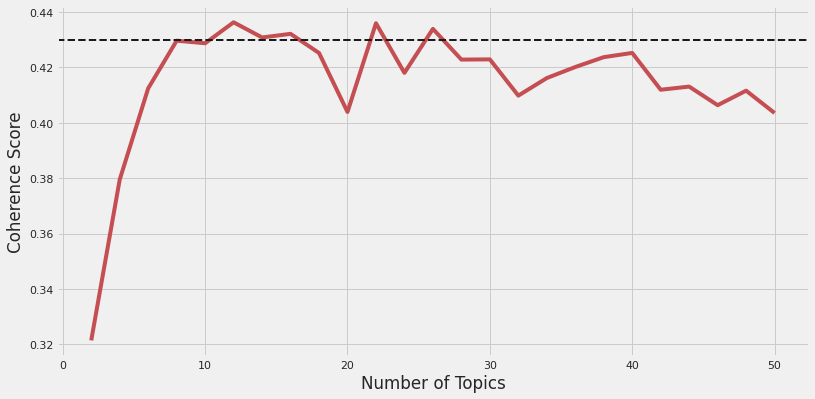

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


x_ax = range(2, 51, 2)
y_ax = coherence_scores

plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_ax, c='r')

plt.axhline(y=0.43, c='k', linestyle='--', linewidth=2)
plt.rcParams['figure.facecolor'] = 'white'

xl = plt.xlabel('Number of Topics')
yl = plt.ylabel('Coherence Score')

plt.show()

* it looks like the score starts increasing rapidly when the number of
topics is five and gradually starts plateauing at 19 or 20.

In [ ]:
# best_model_idx = coherence_df[coherence_df['Number of Topics'] == 10].index[0]
# best_lda_model = lda_models[best_model_idx]
# best_lda_model.num_topics

* Let’s view all the 10 topics generated by our selected best model, similar to our
previous models.

In [ ]:
# topics = [[(term, round(wt, 3)) for term, wt in best_lda_model.show_topic(n, topn=10)] for n in range(0, best_lda_model.num_topics)]

# for idx, topic in enumerate(topics):
#   print('Topic #'+str(idx+1)+':')
#   print([term for term, wt in topic])
#   print()

* A better way of visualizing the topics is to build a term-topic dataframe, as depicted.

In [ ]:
topics_df = pd.DataFrame([[term for term, wt in topic] for topic in topics], columns = ['Term'+str(i) for i in range(1, 11)],
                         index=['Topic '+str(t) for t in range(1, best_lda_model.num_topics+1)]).T
topics_df

* Another easy way to view the topics is to create a topic-term dataframe, whereby each topic is represented in a row with the terms of the topic being represented as a comma-separated string.

In [ ]:
pd.set_option('display.max_colwidth', -1)

topics_df = pd.DataFrame([', '.join([term for term, wt in topic]) for topic in topics], columns = ['Terms per Topic'],
                         index=['Topic '+str(t) for t in range(1, best_lda_model.num_topics+1)] )

topics_df

### WordClouds

In [ ]:
from wordcloud import WordCloud

In [ ]:
# wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
#                max_font_size=150, random_state=42)

In [ ]:
wc = WordCloud(background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

In [ ]:
plt.rcParams['figure.figsize'] = [20, 15]

In [ ]:
# Create subplots for each comedian
i=0
for i in range(10):

    wc.generate(text=topics_df["Terms per Topic"][i])
    
    plt.subplot(5, 4, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(topics_df.index[i])

plt.show()

In [ ]:
import gensim    
model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(best_lda_model)

In [ ]:
vis_data = gensimvis.prepare(model, corpus, id2word)
pyLDAvis.display(vis_data)

In [ ]:
!pip install pyLDAvis

In [ ]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis

In [ ]:
vis_data = gensimvis.prepare(opt_lda_model, bow_corpus, dictionary)
pyLDAvis.display(vis_data)

In [ ]:
import gensim    
model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(opt_lda_model)

In [ ]:
vis_data = gensimvis.prepare(model, bow_corpus, dictionary)
pyLDAvis.display(vis_data)

In [ ]:
from gensim.models.ldamodel import LdaModel
def convertldaGenToldaMallet(mallet_model):
    model_gensim = LdaModel(
        id2word=mallet_model.id2word, num_topics=mallet_model.num_topics,
        alpha=mallet_model.alpha) # original function has 'eta=0' argument
    model_gensim.state.sstats[...] = mallet_model.wordtopics
    model_gensim.sync_state()
    return model_gensim

In [ ]:
new_lda = convertldaGenToldaMallet(opt_lda_model)

In [ ]:
vis_data = gensimvis.prepare(new_lda, bow_corpus, dictionary)
pyLDAvis.display(vis_data)

Source: Dipanjan Sarkar - Text Analytics with Python_ A Practitioner's Guide to Natural Language Processing